# walmart-sales-prediction-project-ml

For this Machine Learning project, we will use the “Walmart Recruiting - Store Sales Forecasting” dataset, from Kaggle.

The goal is to predict the Weekly Sales for specific stores, departments and dates.

![](https://media.istockphoto.com/id/521812367/photo/stocked-shelves-in-grocery-store-aisle.webp?s=2048x2048&w=is&k=20&c=-Cgaqtu55u0aDAt7JFRfwfaYNpZZsS6Iw1te-dtKQYE=)

Walmart is an American Retail, Wholesale and E-commerce business. Sam Walton founded Walmart in 1962 in Rogers, Arkansas. His goal was to help people "Save Money and Live Better" which continues to be Walmart's guiding mission with "Every Day Low Prices(EDLC)" and great service.

 -   Number 1 ranked Fortune 500 company with total revenue of $559 billion as of Jan 31 2021.
 -   Publicly listed company, 'WMT' on the New York Stock Exchange(NYSE)
 -   Each week 220 million customers visit 10,500 stores and clubs under 48 banners in 24 countries and eCommerce websites
 -   Largest private employer in the world with more than 2.3 million people employed around the world

Revenue and operations of the company are categorised into three key business segments - Walmart US, Walmart International and Sam's Club.

They operate in three store types or store formats as below.

 -   Supercenters (general merchandise and grocery, Average store size 178,000 square feet)
 -   Discount stores (general merchandise and limited grocery, Average size 106,000 square feet)
 -   Neighbourhood stores (grocery, Average size 42, 000 square feet)

The business problem is to forecast weekly store sales for Walmart.


In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
!pip install jovian numpy pandas matplotlib seaborn scikit-learn xgboost --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import os
import opendatasets as od
import jovian
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from zipfile import ZipFile

%matplotlib inline
matplotlib.rcParams['font.size'] = 14
sns.set_style('whitegrid')

In [ ]:
dataset_url = 'https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting'

In [ ]:
od.download(dataset_url,force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sagarrajput1412
Your Kaggle Key: ··········


100%|██████████| 2.70M/2.70M [00:00<00:00, 4.50MB/s]



Extracting archive ./walmart-recruiting-store-sales-forecasting/walmart-recruiting-store-sales-forecasting.zip to ./walmart-recruiting-store-sales-forecasting


In [ ]:
data_folder = 'walmart-recruiting-store-sales-forecasting'
os.listdir(data_folder)

['stores.csv',
 'sampleSubmission.csv.zip',
 'train.csv.zip',
 'test.csv.zip',
 'features.csv.zip']

In [ ]:
stores_df = pd.read_csv(data_folder + '/stores.csv')
train_df = pd.read_csv(data_folder + '/train.csv.zip')
submission_df = pd.read_csv(data_folder + '/sampleSubmission.csv.zip')
features_df = pd.read_csv(data_folder + '/features.csv.zip')
test_df = pd.read_csv(data_folder + '/test.csv.zip')

In [ ]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,0
1,1_1_2012-11-09,0
2,1_1_2012-11-16,0
3,1_1_2012-11-23,0
4,1_1_2012-11-30,0
...,...,...
115059,45_98_2013-06-28,0
115060,45_98_2013-07-05,0
115061,45_98_2013-07-12,0
115062,45_98_2013-07-19,0


In [ ]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


## 1. Understanding the dataset description and problem statement

> "You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store. In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.

> stores.csv - This file contains anonymized information about the 45 stores, indicating the type and size of store.

> train.csv - This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file you will find the following fields: Store - the store number; Dept - the department number; Date - the week; Weekly_Sales -  sales for the given department in the given store; IsHoliday - whether the week is a special holiday week.

> test.csv - This file is identical to train.csv, except we have withheld the weekly sales. You must predict the sales for each triplet of store, department, and date in this file.

> features.csv - This file contains additional data related to the store, department, and regional activity for the given dates. It contains the following fields: Store - the store number; Date - the week; Temperature - average temperature in the region; Fuel_Price - cost of fuel in the region; MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA; CPI - the consumer price index; Unemployment - the unemployment rate; IsHoliday - whether the week is a special holiday week.

> For convenience, the four holidays fall within the following weeks in the dataset (not all holidays are in the data): Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13; Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13; Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13; Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13."

Excerpted from: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/data


To access all training data in a single dataframe rather than having it split across three multiple dataframes, we must first combine `features_df` with `stores_df`, then with `train_df` and `test_df`.

After that, we should perform a straightforward exploratory data analysis to better understand the overall trends in the data and the factors that have the biggest effects on sales. After that, we'll begin developing machine-learning algorithms to predict sales.

## 2. Data preparation and exploratory data analysis

 ### Basic data preparation

Let's merge the `features_df` and `stores_df` dataframes.

In [ ]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [ ]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [ ]:
full_features_df = features_df.merge(stores_df, how='inner', on='Store')

In [ ]:
full_features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [ ]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [ ]:
test_df

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False
...,...,...,...,...
115059,45,98,2013-06-28,False
115060,45,98,2013-07-05,False
115061,45,98,2013-07-12,False
115062,45,98,2013-07-19,False


In [ ]:
train_val_df = train_df.merge(full_features_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [ ]:
test_df = test_df.merge(full_features_df, how='inner', on=['Store', 'Date', 'IsHoliday'])

In [ ]:
train_val_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


In [ ]:
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221


Great! The dataframes were successfully merged, and now I have all the data for the train/validation set in just one dataframe.

In [ ]:
del full_features_df, train_df, features_df, stores_df

In [ ]:
train_val_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

In [ ]:
test_df.dtypes

Store             int64
Dept              int64
Date             object
IsHoliday          bool
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Type             object
Size              int64
dtype: object

We must change the Date column's dtype from `object` to `datetime` because it is marked as an `object` dtype. It's crucial to remember that Friday is always the day listed in the Date column. My interpretation of the dataset description is that the Date column simply displays the week, not the precise day. Instead of daily sales, this dataset includes rows of weekly sales.

In [ ]:
train_val_df.Date = pd.to_datetime(train_val_df.Date)
test_df.Date = pd.to_datetime(test_df.Date)

In [ ]:
train_val_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [ ]:
test_df.dtypes

Store                    int64
Dept                     int64
Date            datetime64[ns]
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Type                    object
Size                     int64
dtype: object

In [ ]:
train_val_df['Week'] = train_val_df.Date.dt.isocalendar().week
train_val_df['Month'] = train_val_df.Date.dt.month
train_val_df['Year'] = train_val_df.Date.dt.year

In [ ]:
train_val_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221,43,10,2012


In [ ]:
test_df['Week'] = test_df.Date.dt.isocalendar().week
test_df['Month'] = test_df.Date.dt.month
test_df['Year'] = test_df.Date.dt.year

In [ ]:
test_df

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Week,Month,Year
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,44,11,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115060,45,94,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115061,45,95,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013
115062,45,97,2013-07-26,False,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,B,118221,30,7,2013


Now, we have obtained the `train_val_df` and `test_df` which is essential for data analysis.

## 3. Exploratory data analysis

Exploratory Data Analysis is a process of describing the data by means of statistical and visualization techniques in order to bring important aspects of that data into focus for further analysis.

In [ ]:
train_val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 19 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     150681 non-null  float64       
 8   MarkDown2     111248 non-null  float64       
 9   MarkDown3     137091 non-null  float64       
 10  MarkDown4     134967 non-null  float64       
 11  MarkDown5     151432 non-null  float64       
 12  CPI           421570 non-null  float64       
 13  Unemployment  421570 non-null  float64       
 14  Type          421570 non-null  object        
 15  Size          421

In [ ]:
train_val_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000,421570.0,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739,25.826762,6.449510,2010.968591
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328,14.151887,3.243217,0.796876
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000,1.0,1.000000,2010.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000,14.0,4.000000,2010.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000,26.0,6.000000,2011.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000,38.0,9.000000,2012.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,52.0,12.000000,2012.000000


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
 15  Week          115

In [ ]:
test_df.describe()

,Store,Dept,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Week,Month,Year
count,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000,115064.000000,115064.0,115064.000000,115064.000000
mean,22.238207,44.339524,53.941804,3.581546,7689.216439,3734.051729,2403.088666,3356.219071,3922.681189,176.961347,6.868733,136497.688921,23.050963,5.729855,2012.767182
std,12.809930,30.656410,18.724153,0.239442,10698.760716,8323.495014,13767.939313,7570.501545,19445.150745,41.239967,1.583427,61106.926438,15.750407,3.590331,0.422629
min,1.000000,1.000000,-7.290000,2.872000,-2781.450000,-35.740000,-179.260000,0.220000,-185.170000,131.236226,3.684000,34875.000000,1.0,1.000000,2012.000000
25%,11.000000,18.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000,93638.000000,10.0,3.000000,2013.000000
50%,22.000000,37.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000,140167.000000,20.0,5.000000,2013.000000
75%,33.000000,74.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000,202505.000000,30.0,7.000000,2013.000000
max,45.000000,99.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000,219622.000000,52.0,12.000000,2013.000000


In [ ]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [ ]:
test_df.Year.value_counts()

2013    88275
2012    26789
Name: Year, dtype: int64

In [ ]:
train_val_df.Type.value_counts()

A    215478
B    163495
C     42597
Name: Type, dtype: int64

In [ ]:
test_df.Type.value_counts()

A    58713
B    44500
C    11851
Name: Type, dtype: int64

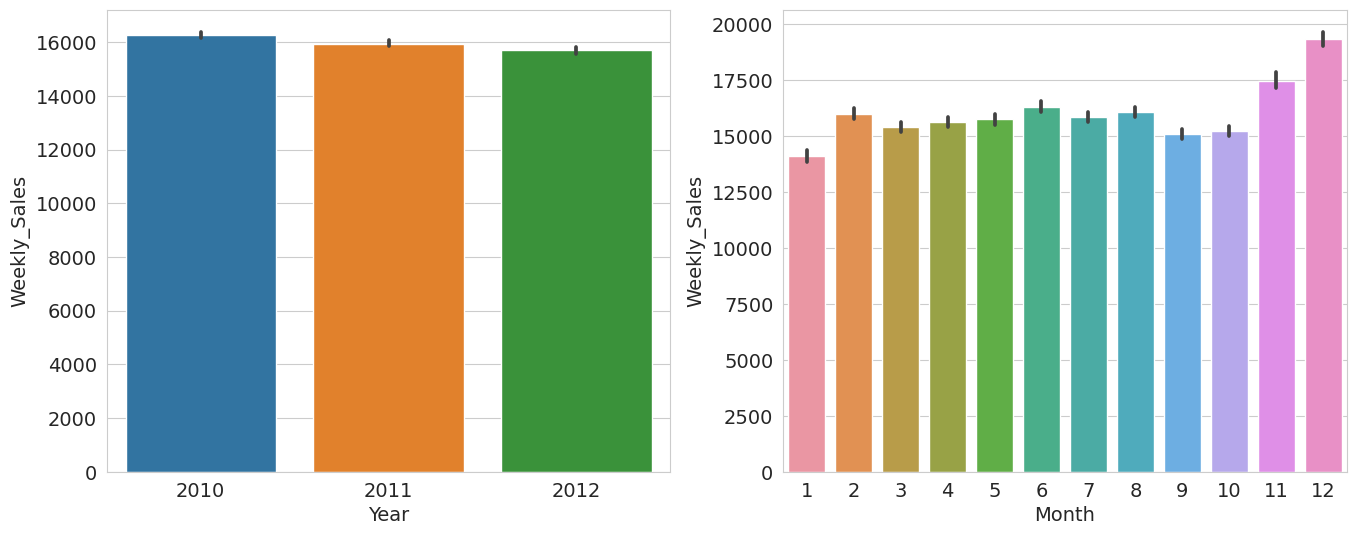

In [ ]:
f,ax=plt.subplots(1,2,figsize=(16,6))
sns.barplot(x='Year', y='Weekly_Sales', data=train_val_df, ax=ax[0]);
sns.barplot(x='Month', y='Weekly_Sales', data=train_val_df, ax=ax[1]);

There seems to be more sales in November and December, compared to the other months.

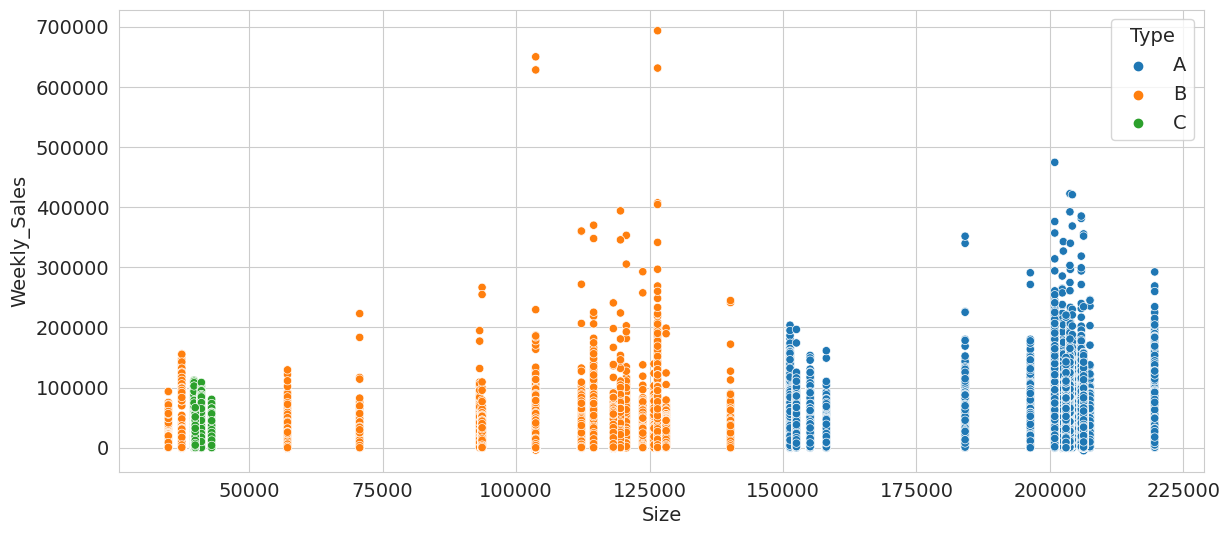

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Size', y='Weekly_Sales', hue='Type', data=train_val_df);

It appears that there is some sort of connection between a business's size and "type" of store. Stores of "type A" appear to be of a huge size, while those of "type B" and "type C" appear to be of a small to medium size. With a few outliers taken into account, it appears that larger stores often have higher weekly sales, which may be the primary factor explaining why "type A" stores appear to have higher weekly sales than "type B" stores, which appear to have higher weekly sales than "type C" stores.

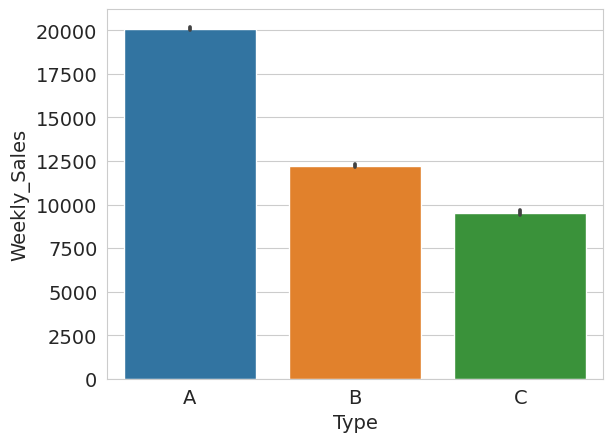

In [ ]:
sns.barplot(x='Type', y='Weekly_Sales', data=train_val_df);

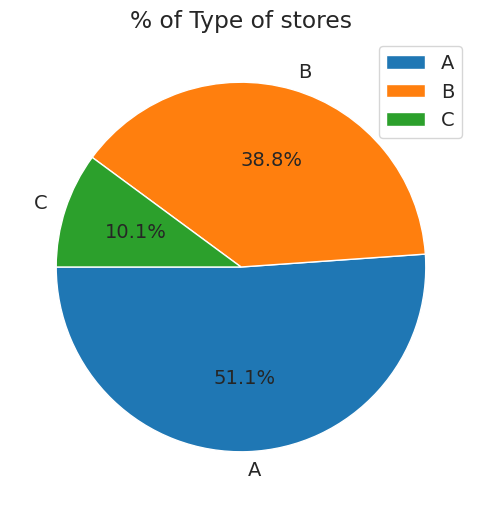

In [ ]:
plt.figure(figsize=(12,6))
plt.title("% of Type of stores")
plt.pie(train_val_df.Type.value_counts(), labels=train_val_df.Type.value_counts().index, autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

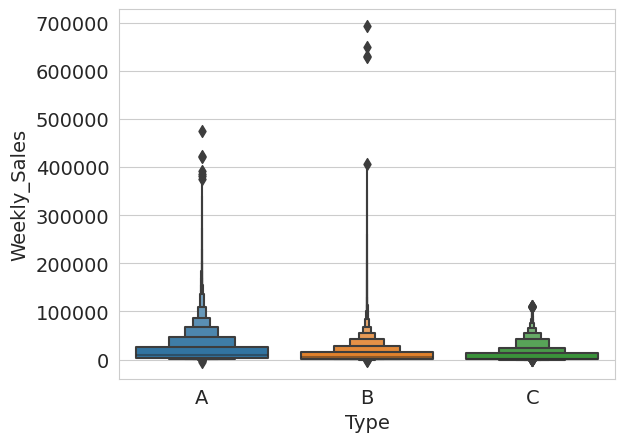

In [ ]:
sns.boxenplot(x='Type', y='Weekly_Sales', data=train_val_df);

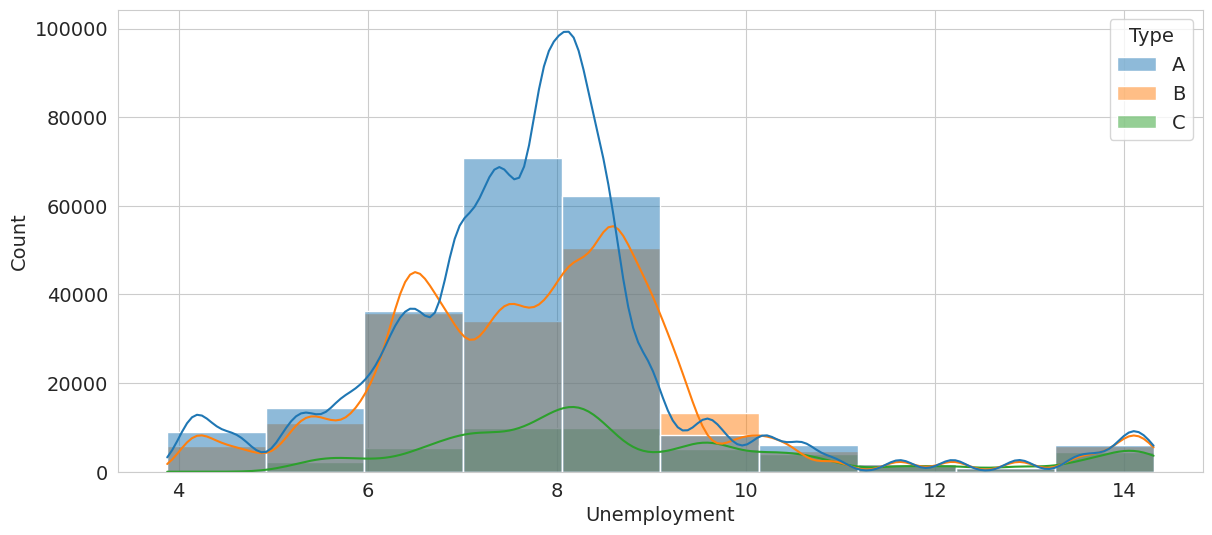

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Unemployment', bins=10, hue='Type', kde=True, data = train_val_df);

Surprisingly, it was found that unemployed people tended to frequent type A stores more frequently than type B and type C which places importance on size with respect to count of unemployed.

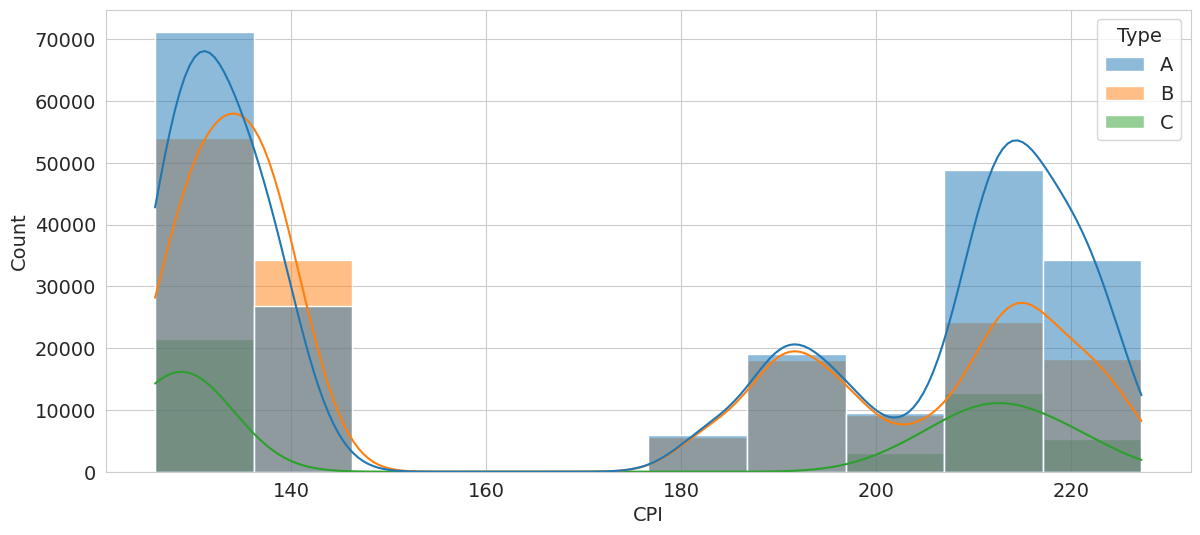

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(x='CPI', bins=10, hue='Type', kde=True, data = train_val_df);

>   "What Is Consumer Price Index (CPI)?"

>   "The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. Changes in the CPI are used to assess price changes associated with the cost of living."
Source: https://www.investopedia.com/terms/c/consumerpriceindex.asp

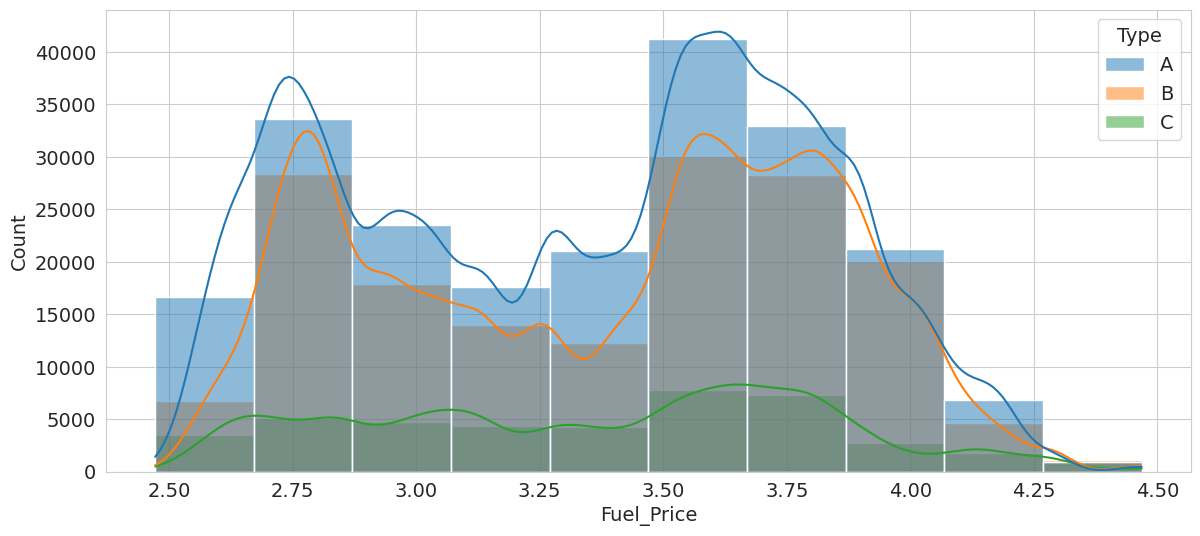

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Fuel_Price', bins=10, hue='Type', kde=True, data = train_val_df);

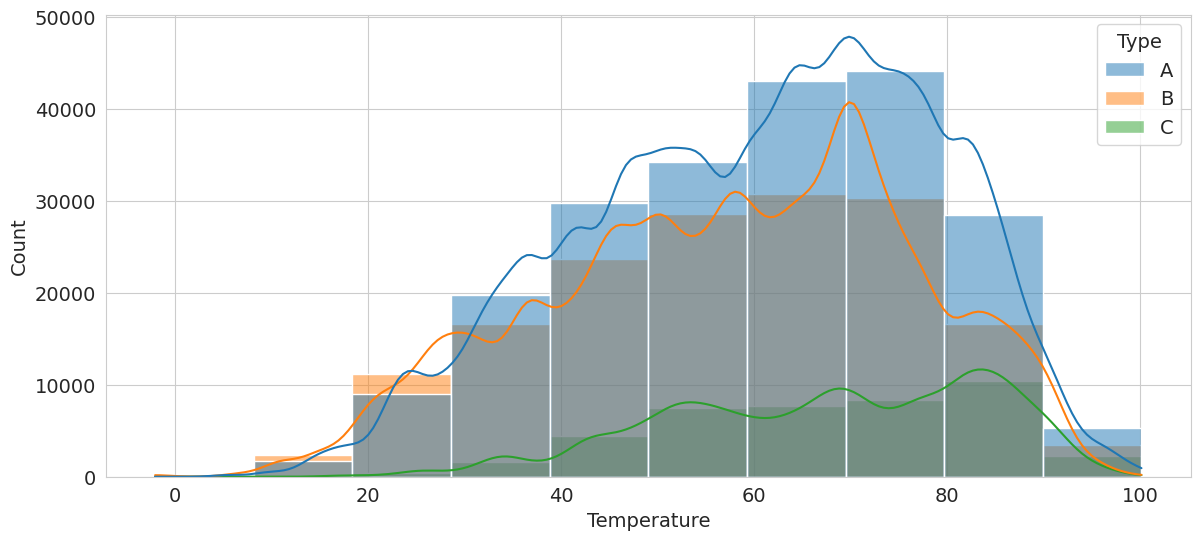

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(x='Temperature', bins=10, hue='Type', kde=True, data = train_val_df);

It seems when it's either too cold or too hot, there are lower sales.

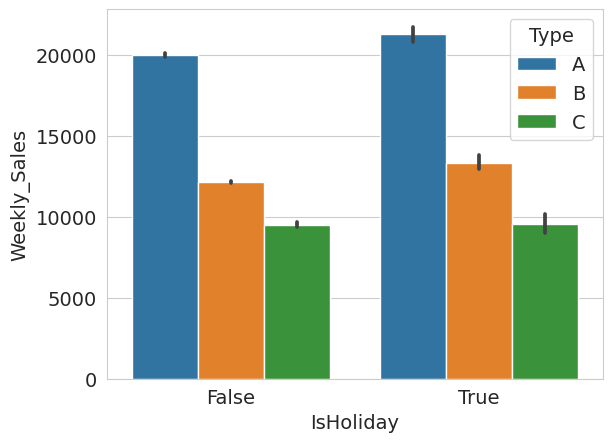

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', hue='Type', data=train_val_df);

It seems `Weekly_Sales` over holiday is bit more than no holiday day which is specially visible in `Type A` stores followed by `Type B` stores.

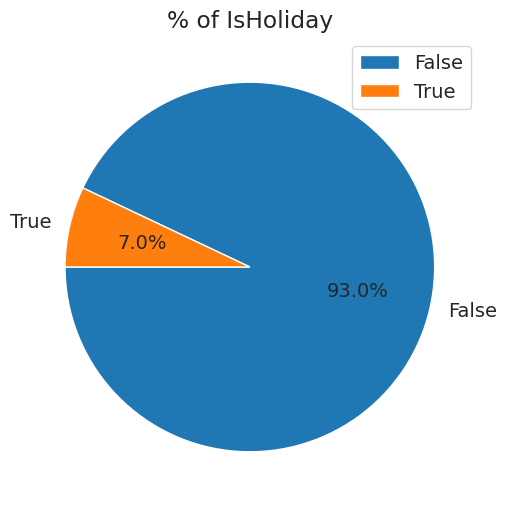

In [ ]:
plt.figure(figsize=(12,6))
plt.title("% of IsHoliday")
plt.pie(train_val_df.IsHoliday.value_counts(), labels=train_val_df.IsHoliday.value_counts().index, autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

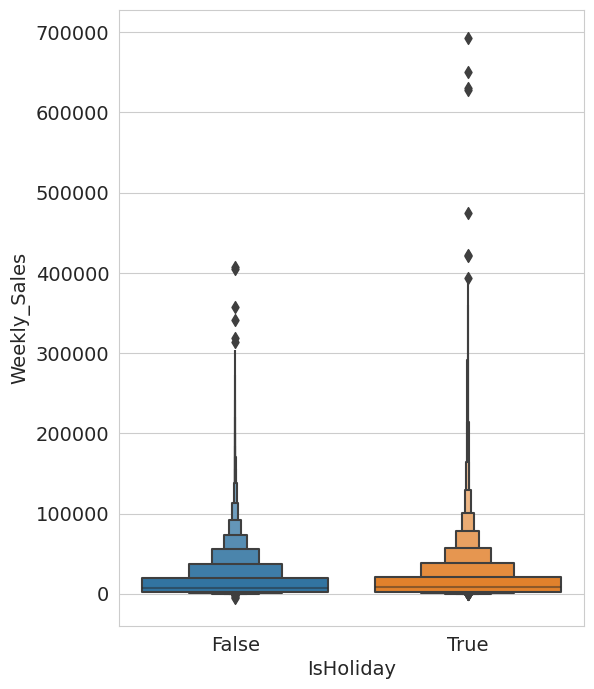

In [ ]:
plt.figure(figsize=(6,8))
sns.boxenplot(x='IsHoliday', y='Weekly_Sales', data=train_val_df);

It seems there is a tendency of higher sales in the holidays though holidays accounts 7 % of sales duration.

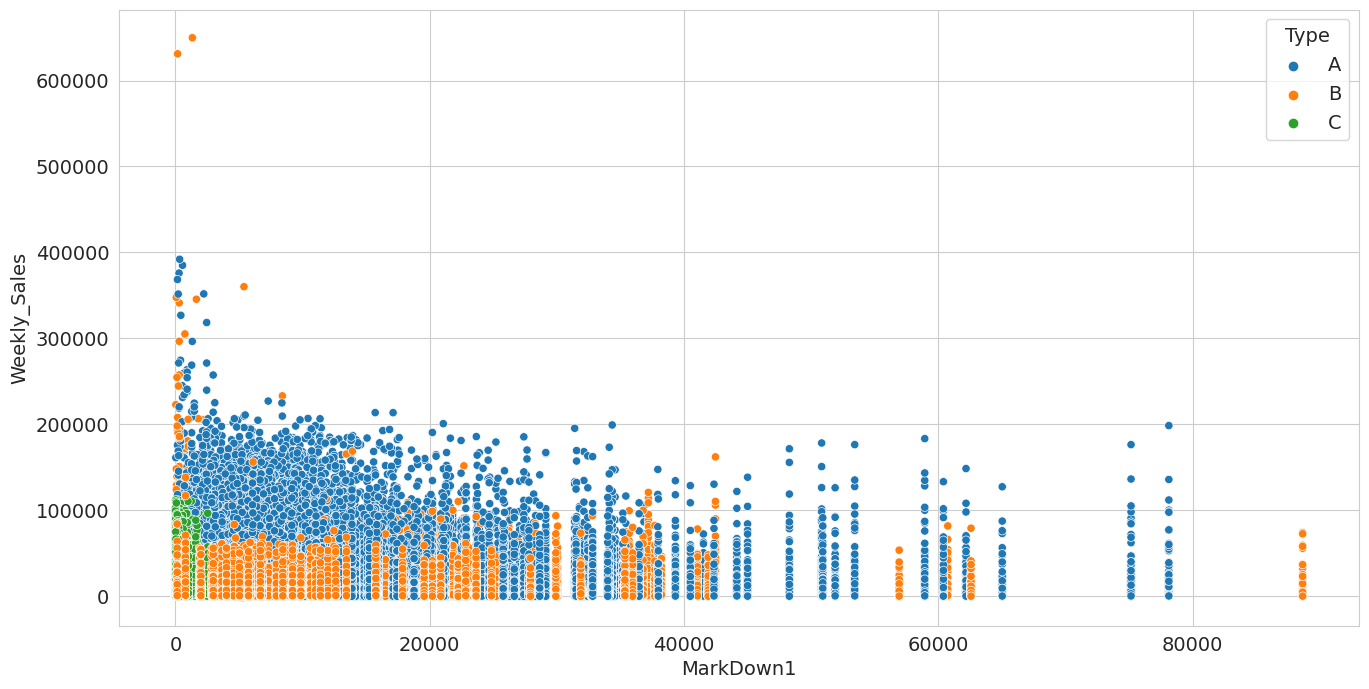

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='MarkDown1', y='Weekly_Sales', hue='Type', data=train_val_df);

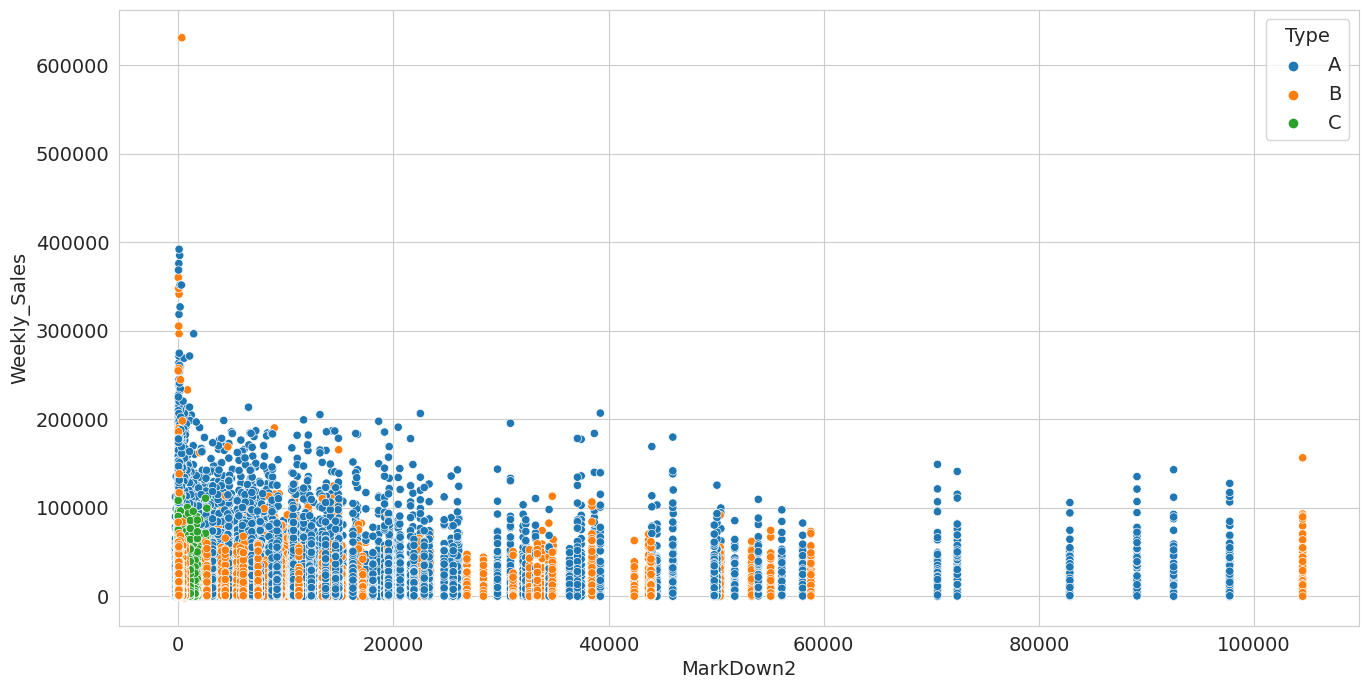

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='MarkDown2', y='Weekly_Sales', hue='Type', data=train_val_df);

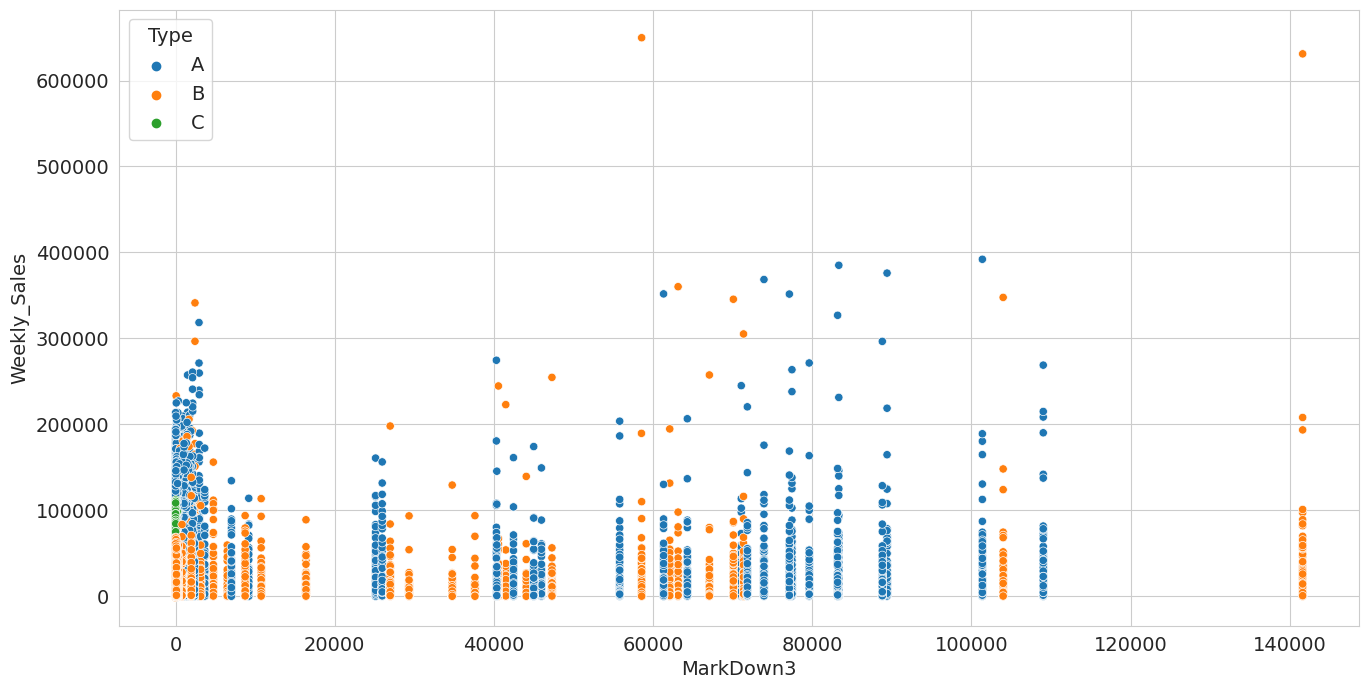

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='MarkDown3', y='Weekly_Sales', hue='Type', data=train_val_df);

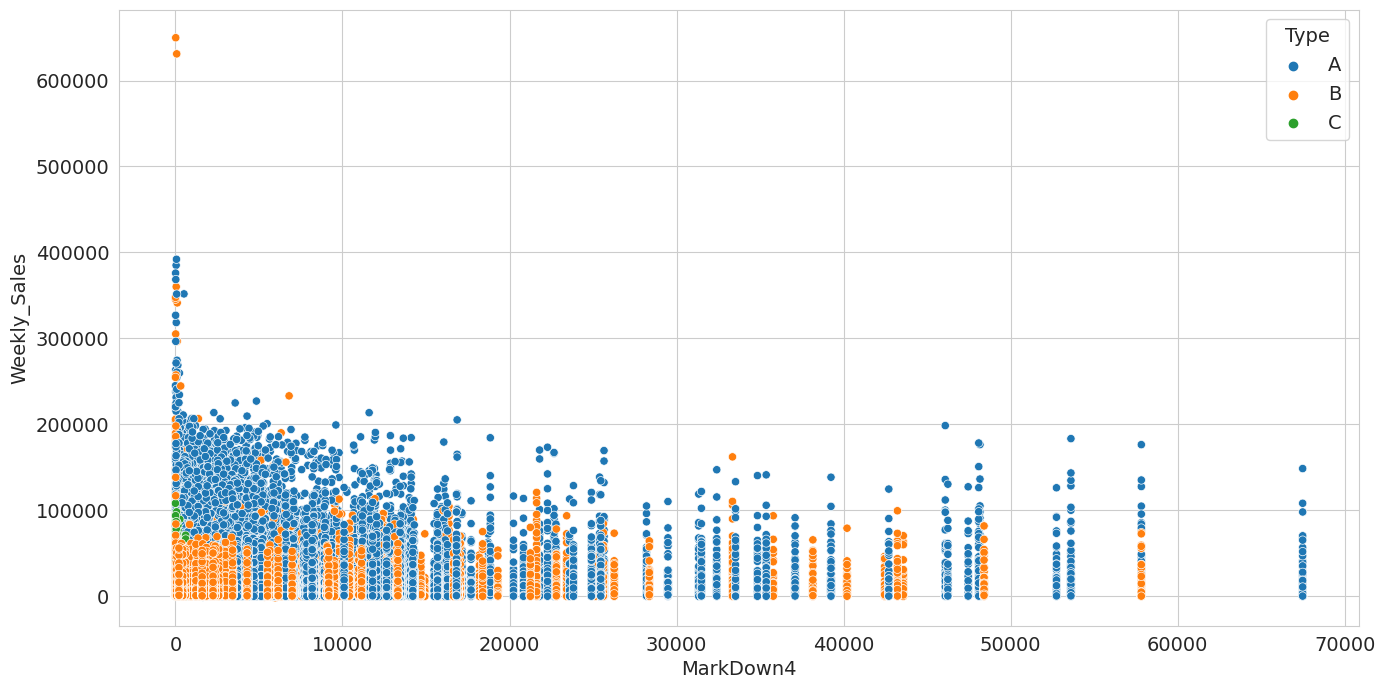

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='MarkDown4', y='Weekly_Sales', hue='Type', data=train_val_df);

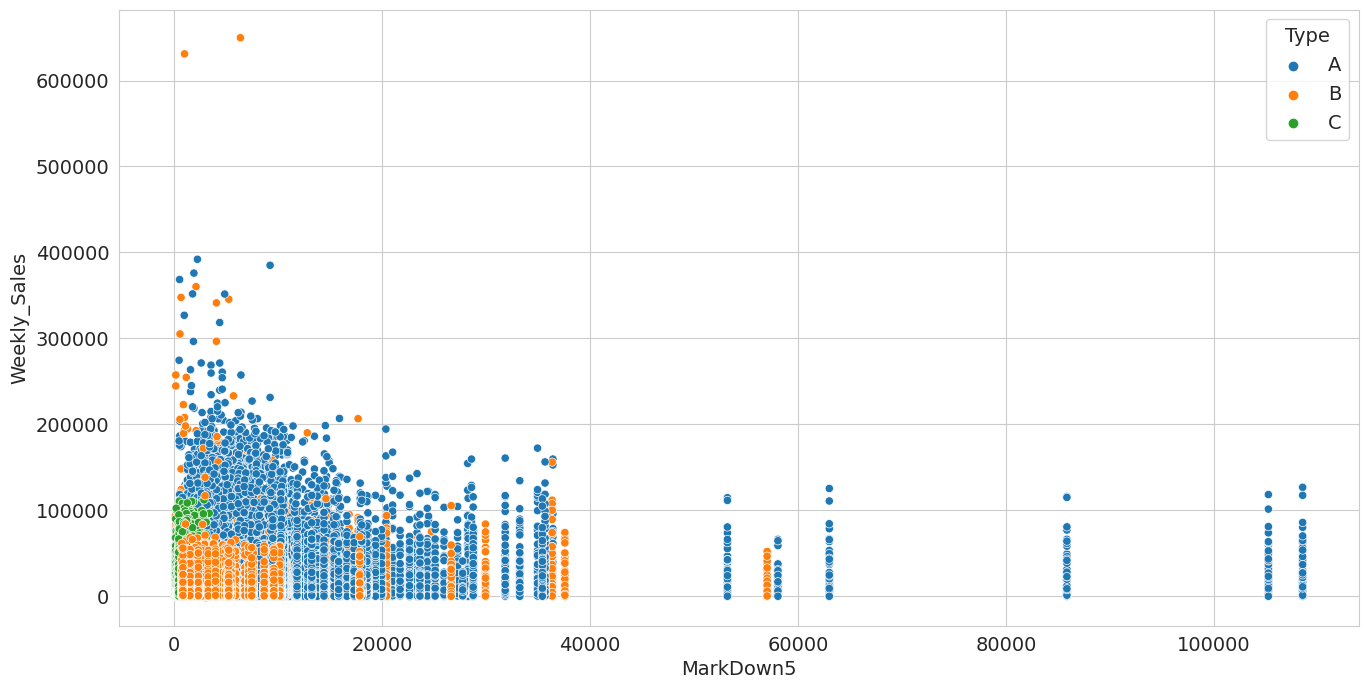

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='MarkDown5', y='Weekly_Sales', hue='Type', data=train_val_df);

#### Correlation

The greater the absolute value of the correlation coefficient, the stronger the relationship and the sign of the correlation coefficient represents the direction of the relationship.

<ipython-input-59-98f2da8a19bf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_val_df.corr()


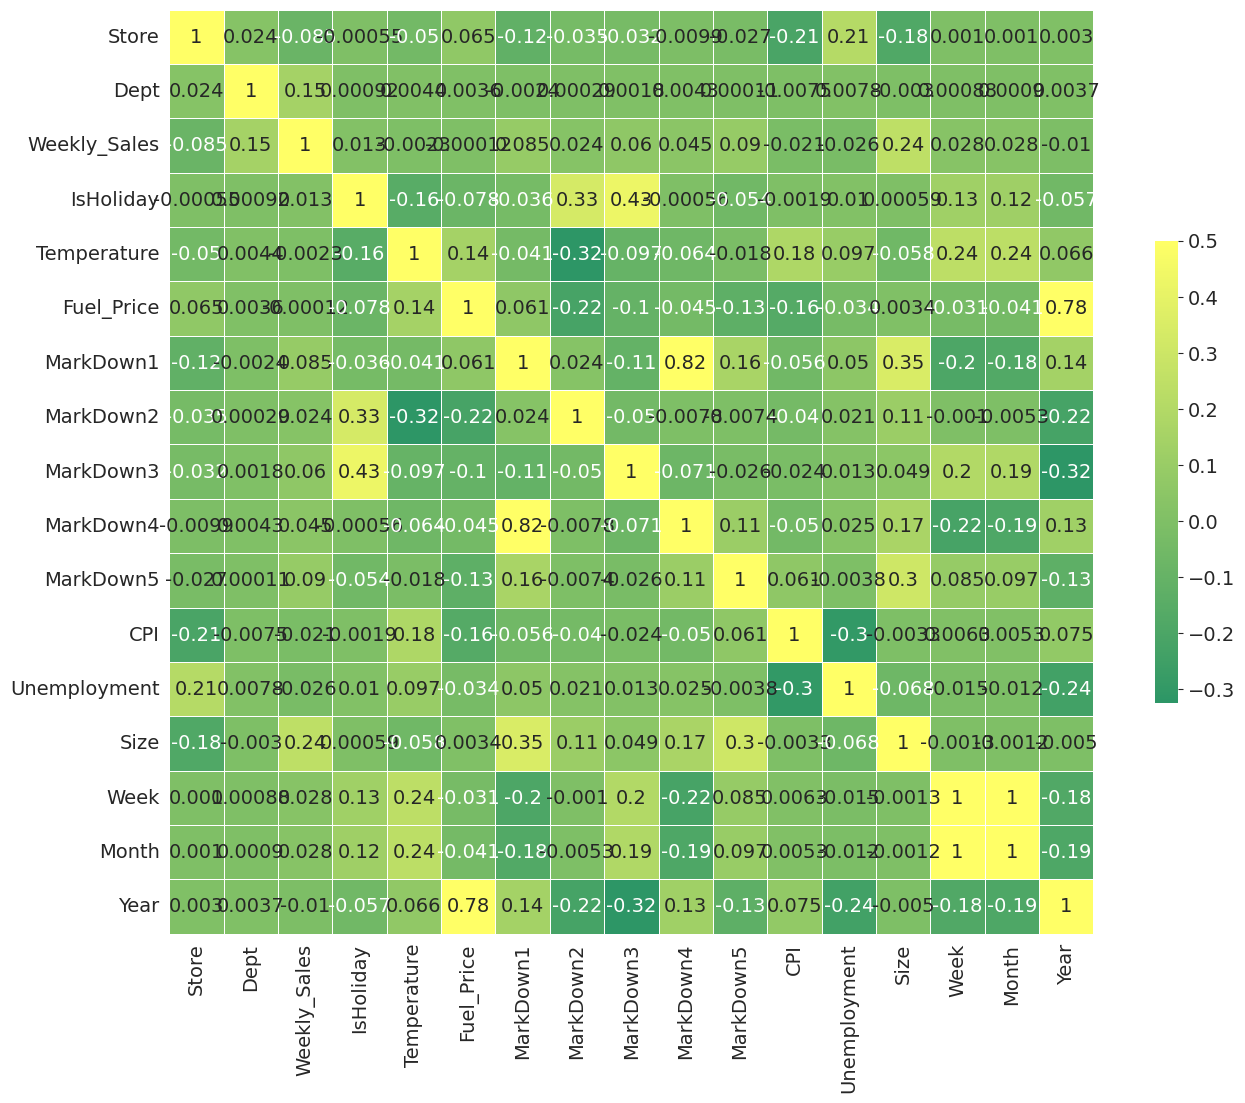

In [ ]:
corr = train_val_df.corr()
plt.subplots(figsize=(16, 12))
sns.heatmap(corr, cmap='summer', vmax=.5, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={'shrink': .5})
sns.set(font_scale= 0.8)
plt.show()

The above correlation coefficients can be interpreted as the only variables with high correlation seem to be Week and Month, MarkDown1 and MarkDown4, and Fuel_Price and Year.

### Creating the training-validation split and preparing the data for modelling

Splitting available data into train, val and test is an important step before training a model on the data and using the model parameters to using the model in the real world for prediction.

 -   train : used to fit our model (get the parameters based on our features)
 -   val : used to tune hyperparameters ( regularise for bias and variance)
 -   test: evaluate model performance close to real world/future

Therefore it is important that the val and test sets are as close to the real world as possible. So experiment with your train_val_test splits.

In [ ]:
train_val_df.Year.value_counts()

2011    153453
2010    140679
2012    127438
Name: Year, dtype: int64

In [ ]:
train_df = train_val_df[train_val_df.Year < 2012]
val_df = train_val_df[train_val_df.Year == 2012]

In [ ]:
input_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
              'MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5', 
              'Unemployment', 'Type', 'Size', 'Week']
target_col = 'Weekly_Sales'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
test_inputs = test_df[input_cols].copy()

In [ ]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
0,1,1,False,42.31,2.572,211.096358,NaN,NaN,NaN,NaN,NaN,8.106,A,151315,5
1,1,2,False,42.31,2.572,211.096358,NaN,NaN,NaN,NaN,NaN,8.106,A,151315,5
2,1,3,False,42.31,2.572,211.096358,NaN,NaN,NaN,NaN,NaN,8.106,A,151315,5
3,1,4,False,42.31,2.572,211.096358,NaN,NaN,NaN,NaN,NaN,8.106,A,151315,5
4,1,5,False,42.31,2.572,211.096358,NaN,NaN,NaN,NaN,NaN,8.106,A,151315,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,45,93,True,37.79,3.389,189.062016,3604.35,43941.56,287.45,357.43,750.01,8.523,B,118221,52
418661,45,94,True,37.79,3.389,189.062016,3604.35,43941.56,287.45,357.43,750.01,8.523,B,118221,52
418662,45,95,True,37.79,3.389,189.062016,3604.35,43941.56,287.45,357.43,750.01,8.523,B,118221,52
418663,45,97,True,37.79,3.389,189.062016,3604.35,43941.56,287.45,357.43,750.01,8.523,B,118221,52


In [ ]:
train_targets

0         24924.50
1         50605.27
2         13740.12
3         39954.04
4         32229.38
            ...   
418660     1426.52
418661     2979.03
418662    42084.36
418663     5569.82
418664      553.21
Name: Weekly_Sales, Length: 294132, dtype: float64

In [ ]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
7169,1,1,False,49.01,3.157,219.714258,6277.39,21813.16,143.1,1450.13,8483.00,7.348,A,151315,1
7170,1,2,False,49.01,3.157,219.714258,6277.39,21813.16,143.1,1450.13,8483.00,7.348,A,151315,1
7171,1,3,False,49.01,3.157,219.714258,6277.39,21813.16,143.1,1450.13,8483.00,7.348,A,151315,1
7172,1,4,False,49.01,3.157,219.714258,6277.39,21813.16,143.1,1450.13,8483.00,7.348,A,151315,1
7173,1,5,False,49.01,3.157,219.714258,6277.39,21813.16,143.1,1450.13,8483.00,7.348,A,151315,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,93,False,58.85,3.882,192.308899,4018.91,58.08,100.0,211.94,858.33,8.667,B,118221,43
421566,45,94,False,58.85,3.882,192.308899,4018.91,58.08,100.0,211.94,858.33,8.667,B,118221,43
421567,45,95,False,58.85,3.882,192.308899,4018.91,58.08,100.0,211.94,858.33,8.667,B,118221,43
421568,45,97,False,58.85,3.882,192.308899,4018.91,58.08,100.0,211.94,858.33,8.667,B,118221,43


In [ ]:
val_targets

7169      16567.69
7170      44481.38
7171      13926.04
7172      40925.76
7173      23105.81
            ...   
421565     2487.80
421566     5203.31
421567    56017.47
421568     6817.48
421569     1076.80
Name: Weekly_Sales, Length: 127438, dtype: float64

In [ ]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
0,1,1,False,55.32,3.386,223.462779,6766.44,5147.70,50.82,3639.90,2737.42,6.573,A,151315,44
1,1,2,False,55.32,3.386,223.462779,6766.44,5147.70,50.82,3639.90,2737.42,6.573,A,151315,44
2,1,3,False,55.32,3.386,223.462779,6766.44,5147.70,50.82,3639.90,2737.42,6.573,A,151315,44
3,1,4,False,55.32,3.386,223.462779,6766.44,5147.70,50.82,3639.90,2737.42,6.573,A,151315,44
4,1,5,False,55.32,3.386,223.462779,6766.44,5147.70,50.82,3639.90,2737.42,6.573,A,151315,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,45,93,False,76.06,3.804,NaN,212.02,851.73,2.06,10.88,1864.57,NaN,B,118221,30
115060,45,94,False,76.06,3.804,NaN,212.02,851.73,2.06,10.88,1864.57,NaN,B,118221,30
115061,45,95,False,76.06,3.804,NaN,212.02,851.73,2.06,10.88,1864.57,NaN,B,118221,30
115062,45,97,False,76.06,3.804,NaN,212.02,851.73,2.06,10.88,1864.57,NaN,B,118221,30


In [ ]:
numeric_cols = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI','MarkDown1',
                'MarkDown2','MarkDown3','MarkDown4', 'MarkDown5', 'Unemployment', 'Size', 'Week']

In [ ]:
categorical_cols = ['Type']

### Imputing missing numeric values in the `test_inputs` dataframe

In [ ]:
train_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']] = train_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
val_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = val_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
test_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = test_inputs[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)

In [ ]:
test_inputs.isna().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
MarkDown1           0
MarkDown2           0
MarkDown3           0
MarkDown4           0
MarkDown5           0
Unemployment    38162
Type                0
Size                0
Week                0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='mean').fit(test_inputs[numeric_cols])

In [ ]:
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [ ]:
test_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

In [ ]:
train_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

In [ ]:
val_inputs.isna().sum()

Store           0
Dept            0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
Unemployment    0
Type            0
Size            0
Week            0
dtype: int64

### Scaling numeric features

In [ ]:
full_inputs_df = pd.concat([train_inputs, val_inputs, test_inputs])

In [ ]:
scaler = MinMaxScaler().fit(full_inputs_df[numeric_cols])

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000


In [ ]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529


In [ ]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627


In [ ]:
train_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week
min,0.0,0.0,0.0,0.047876,0.000000,0.000000,0.026248,0.002536,0.001192,0.000000,0.000240,0.069245,0.0,0.0
max,1.0,1.0,1.0,0.983431,0.871242,0.944353,0.350390,1.000000,0.947531,0.308772,0.048944,1.000000,1.0,1.0


In [ ]:
val_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week
min,0.0,0.0,0.0,0.135024,0.28006,0.039777,0.026248,0.000000,0.001003,0.0,0.000438,0.018346,0.0,0.000000
max,1.0,1.0,1.0,0.982790,1.00000,0.983057,0.862804,0.441256,0.008520,1.0,0.140876,0.799981,1.0,0.823529


In [ ]:
test_inputs.describe().loc[['min', 'max']]

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week
min,0.0,0.0,0.0,0.0,0.200401,0.050259,0.0,0.002195,0.0,0.00000,0.0,0.000000,0.0,0.0
max,1.0,1.0,1.0,1.0,0.828156,1.000000,1.0,0.680820,1.0,0.96843,1.0,0.612946,1.0,1.0


From the above data, we get to see the scaled data in min and max values.

### Encoding categorical data

Values between 0 and 1 are transformed in each column by a MinMax Scaler. Since One-hot and IsHoliday are already in the range of 0 and 1, they won't be influenced by the use of encoded columns, which have been utilised to handle nominal and ordinal encoded columns.

In [ ]:
encoder = OneHotEncoder(sparse_output=False).fit(full_inputs_df[categorical_cols])

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [ ]:
encoded_cols

['Type_A', 'Type_B', 'Type_C']

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [ ]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,A,0.630267,0.078431,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000,0.0,1.0,0.0
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,B,0.451136,1.000000,0.0,1.0,0.0


In [ ]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,A,0.630267,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529,0.0,1.0,0.0
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,B,0.451136,0.823529,0.0,1.0,0.0


In [ ]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Type,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,A,0.630267,0.843137,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627,0.0,1.0,0.0
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,B,0.451136,0.568627,0.0,1.0,0.0


We will remove the categorical column (Type) from the dataframe because we already have the encoded columns.

In [ ]:
train_inputs = train_inputs[numeric_cols + encoded_cols]
val_inputs = val_inputs[numeric_cols + encoded_cols]
test_inputs = test_inputs[numeric_cols + encoded_cols]

In [ ]:
train_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,0.630267,0.078431,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,0.630267,0.078431,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,0.630267,0.078431,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,0.630267,0.078431,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.454046,0.050100,0.826259,0.026248,0.002536,0.001198,0.000000,0.000240,0.416032,0.630267,0.078431,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418660,1.0,0.938776,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,0.451136,1.000000,0.0,1.0,0.0
418661,1.0,0.948980,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,0.451136,1.000000,0.0,1.0,0.0
418662,1.0,0.959184,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,0.451136,1.000000,0.0,1.0,0.0
418663,1.0,0.979592,1.0,0.412669,0.459419,0.612152,0.060262,0.421885,0.003118,0.005297,0.001212,0.455264,0.451136,1.000000,0.0,1.0,0.0


In [ ]:
val_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week,Type_A,Type_B,Type_C
7169,0.0,0.000000,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,0.630267,0.000000,1.0,0.0,0.0
7170,0.0,0.010204,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,0.630267,0.000000,1.0,0.0,0.0
7171,0.0,0.020408,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,0.630267,0.000000,1.0,0.0,0.0
7172,0.0,0.030612,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,0.630267,0.000000,1.0,0.0,0.0
7173,0.0,0.040816,0.0,0.515379,0.343186,0.909999,0.085488,0.210706,0.002154,0.021491,0.011234,0.344717,0.630267,0.000000,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,1.0,0.938776,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,0.451136,0.823529,0.0,1.0,0.0
421566,1.0,0.948980,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,0.451136,0.823529,0.0,1.0,0.0
421567,1.0,0.959184,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,0.451136,0.823529,0.0,1.0,0.0
421568,1.0,0.979592,0.0,0.605456,0.706413,0.643701,0.064175,0.003091,0.001866,0.003141,0.001352,0.468812,0.451136,0.823529,0.0,1.0,0.0


In [ ]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week,Type_A,Type_B,Type_C
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0


Done! Now we have the data ready to start training machine learning models!

In [ ]:
print(train_inputs.shape)
print(train_targets.shape)

print(val_inputs.shape)
print(val_targets.shape)

print(test_inputs.shape)

(294132, 17)
(294132,)
(127438, 17)
(127438,)
(115064, 17)


## 4. Train Hardcoded & Baseline Models

-    Hardcoded model: always predict average fare
-    Baseline model: Linear regression

For evaluation the dataset uses WMAE error: https://www.kaggle.com/competitions/walmart-recruiting-store-sales-forecasting/overview/evaluation


### Train & Evaluate Hardcoded Model

Let's create a simple model that always predicts the average.


In [ ]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs, train_targets)

In [ ]:
mean_model.mean

16105.306895407504

In [ ]:
train_preds = mean_model.predict(train_inputs)

In [ ]:
train_preds

array([16105.30689541, 16105.30689541, 16105.30689541, ...,
       16105.30689541, 16105.30689541, 16105.30689541])

In [ ]:
val_preds = mean_model.predict(val_inputs)

In [ ]:
val_preds

array([16105.30689541, 16105.30689541, 16105.30689541, ...,
       16105.30689541, 16105.30689541, 16105.30689541])

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - mean_model.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - mean_model.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(15431.304622795253, 15247.624012740143)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)

In [ ]:
train_rmse

22961.261972610493

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)

In [ ]:
val_rmse

22124.262386056387

Our dumb hard-coded model is off by 22124.262386056387

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 15431.304622795253, Validation WMAE: 15247.624012740143


Our dumb hard-coded model is off by 15247.624012740143

### Train & Evaluate Baseline Model

We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg_model = LinearRegression()

In [ ]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [ ]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([13478., 13584., 13692., ..., 15500., 15714., 15820.])

In [ ]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([13752., 13860., 13966., ..., 15864., 16078., 16184.])

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

21927.395855378792

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

21071.570966726158

The linear regression model is off by 21071.570966726158, which isn't much better than simply predicting the average.

However, now we have a baseline that our other models should ideally beat.

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - linreg_model.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - linreg_model.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(14897.985346662963, 14578.63809412713)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 14897.985346662963, Validation WMAE: 14578.63809412713


Here, we can see that the WMAE loss for our train data is 14897.985346662963 and the WMAE loss for our validation data is 14578.63809412713

## 5. Train & Evaluate Different Models

We'll train each of the following & submit predictions to Kaggle:

  -  Linear Regression
  -  Decision Tree
  -  Random Forest
  -  Gradient Boosting


### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
linreg_model1 = Ridge(random_state=42)

In [ ]:
linreg_model1.fit(train_inputs, train_targets)

Ridge(random_state=42)

In [ ]:
train_preds = linreg_model1.predict(train_inputs)
train_preds

array([13451.88636207, 13558.96431014, 13666.04225821, ...,
       15523.06833546, 15737.22423159, 15844.30217966])

In [ ]:
val_preds = linreg_model1.predict(val_inputs)
val_preds

array([13524.27935484, 13631.35730291, 13738.43525098, ...,
       15913.05168041, 16127.20757655, 16234.28552462])

In [ ]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

21927.476950926088

In [ ]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

21050.57317441333

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

Train RMSE: 21927.476950926088, Validation RMSE: 21050.57317441333


Here, we can see that the RMSE loss for our train data is 21927.476950926088 and the RMSE loss for our validation data is 21050.57317441333

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - linreg_model1.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - linreg_model1.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(14898.595987171097, 14630.054938938078)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 14898.595987171097, Validation WMAE: 14630.054938938078


Here, we can see that the WMAE loss for our train data is 14898.595987171097 and the WMAE loss for our validation data is 14630.054938938078

### Decision Tree

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. It is one way to display an algorithm that only contains conditional control statements.

To create our decision tree model, we can use the function DecisionTreeRegressor.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree = DecisionTreeRegressor(random_state = 42)

Now, we fit our model to the training data.

In [ ]:
%%time
tree.fit(train_inputs, train_targets)

CPU times: user 4.62 s, sys: 36.4 ms, total: 4.65 s
Wall time: 6.99 s


DecisionTreeRegressor(random_state=42)

We generate predictions on the training and validation sets using the trained decision tree, compute the Root Mean Squared Error (RMSE) loss and Weighted Mean Absolute Error (WMAE) loss.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
tree_train_preds = tree.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [ ]:
tree_val_preds = tree.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 1.0238780422587396e-16, Validation RMSE: 6657.42296667554


Here, we can see that the RMSE loss for our train data is 1.0238780422587396e-16 and the RMSE loss for our validation data is 6657.42296667554

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - tree.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - tree.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(3.8306759469305903e-19, 3007.502554822677)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 3.8306759469305903e-19, Validation WMAE: 3007.502554822677


Here, we can see that the WMAE loss for our train data is 3.8306759469305903e-19 and the WMAE loss for our validation data is 3007.502554822677

### Decision tree visualization

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Let's visualize the tree graphically using plot_tree.

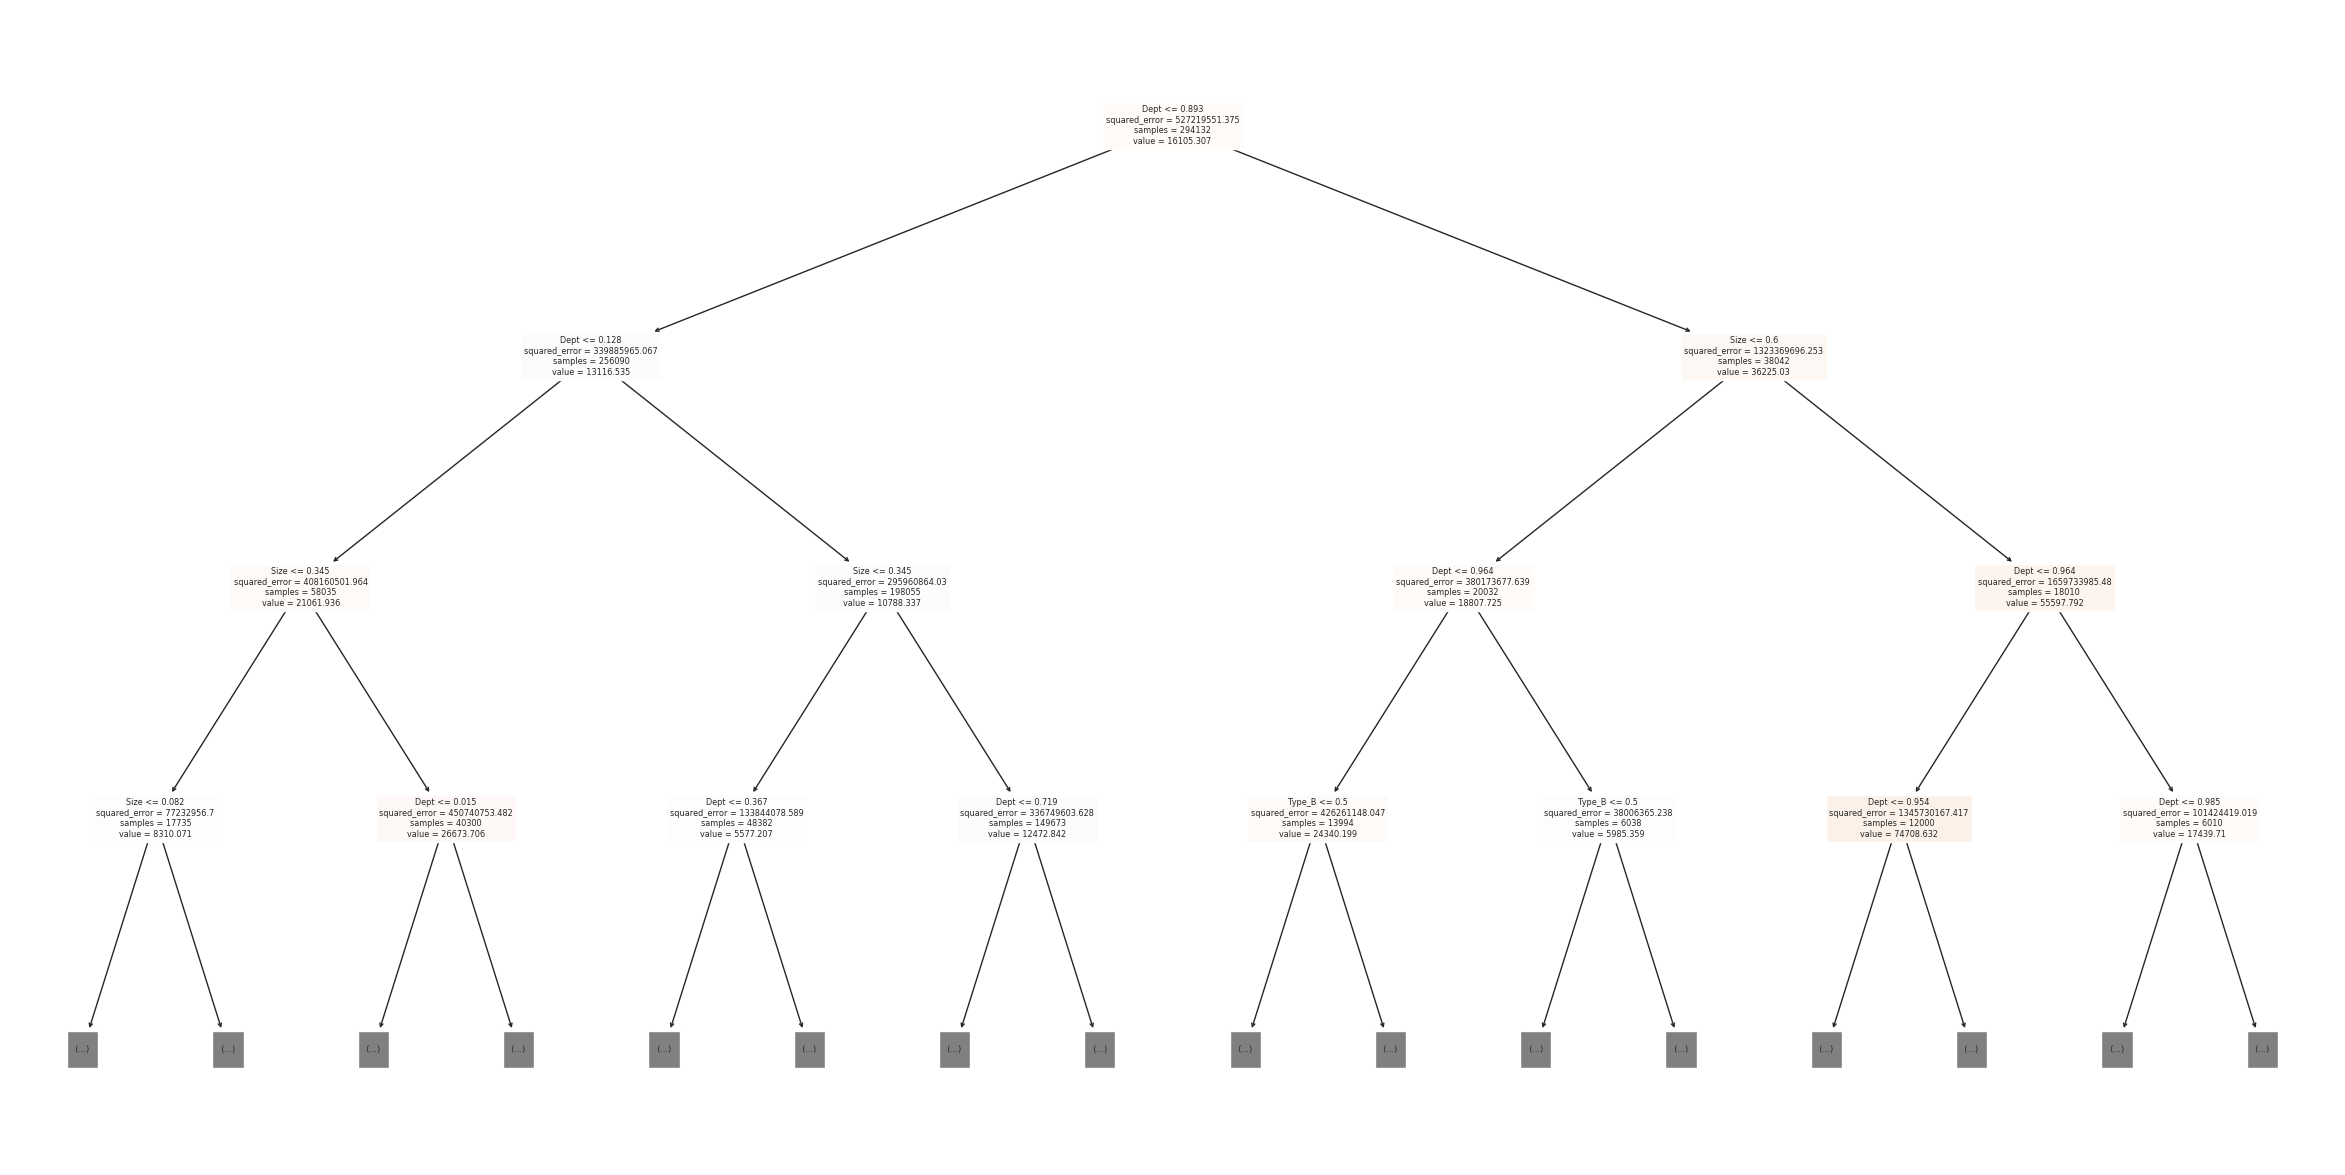

In [ ]:
plt.figure(figsize=(30,15))
plot_tree(tree, feature_names=train_inputs.columns, max_depth=3, filled=True);

Now, let Visualize the tree textually using export_text.

In [ ]:
tree_text = export_text(tree, feature_names=list(train_inputs.columns))

Here we can display the first few lines.

In [ ]:
print(tree_text[:2000])

|--- Dept <= 0.89
|   |--- Dept <= 0.13
|   |   |--- Size <= 0.35
|   |   |   |--- Size <= 0.08
|   |   |   |   |--- Dept <= 0.02
|   |   |   |   |   |--- Dept <= 0.01
|   |   |   |   |   |   |--- Type_A <= 0.50
|   |   |   |   |   |   |   |--- Week <= 0.75
|   |   |   |   |   |   |   |   |--- Unemployment <= 0.57
|   |   |   |   |   |   |   |   |   |--- Store <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Week <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- Week >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 12
|   |   |   |   |   |   |   |   |   |--- Store >  0.07
|   |   |   |   |   |   |   |   |   |   |--- Store <= 0.94
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 20
|   |   |   |   |   |   |   |   |   |   |--- Store >  0.94
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   

### Decision Tree feature importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important.

In [ ]:
tree_importances = tree.feature_importances_

In [ ]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [ ]:
tree_importance_df

,feature,importance
1,Dept,0.620809
12,Size,0.185332
13,Week,0.059842
0,Store,0.046891
5,CPI,0.033105
11,Unemployment,0.014346
3,Temperature,0.011370
15,Type_B,0.010882
4,Fuel_Price,0.006296
14,Type_A,0.003935


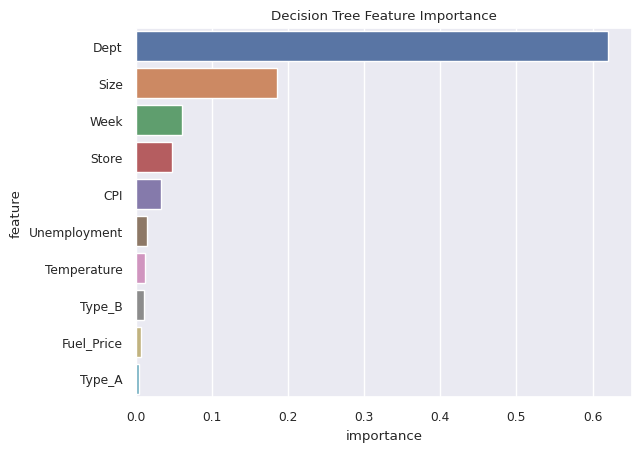

In [ ]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

The variables Dept, Size, Week and Store are the most important for this model.

### Random Forest

Random forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

For classification tasks, the output of the random forest is the class selected by most trees.

For regression tasks, the mean or average prediction of the individual trees is returned.

To create our random forest model, we can use the function RandomForestRegressor.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

When I created the random forest with the default number of estimators (100), the jupyter notebook crashed due to a lack of memory, so let's start with a number of estimators of 10.

In [ ]:
rf1 = RandomForestRegressor(random_state=42, n_estimators=10)

Now, we fit our model to the training data.

In [ ]:
%%time
rf1.fit(train_inputs, train_targets)

CPU times: user 28.3 s, sys: 174 ms, total: 28.5 s
Wall time: 31.4 s


RandomForestRegressor(n_estimators=10, random_state=42)

Now we generate predictions on the training and validation sets using the trained random forest, and compute the Root Mean Squared Error (RMSE) loss.

In [ ]:
rf1_train_preds = rf1.predict(train_inputs)

In [ ]:
rf1_train_rmse = mean_squared_error(train_targets, rf1_train_preds, squared=False)

In [ ]:
rf1_val_preds = rf1.predict(val_inputs)

In [ ]:
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 1681.536793641062, Validation RMSE: 5333.669092896008


Here, we can see that the RMSE loss for our train data is 1649.5464592185701 and the RMSE loss for our validation data is 5287.331519602356

The random forest model shows better results for the validation RMSE, so we will use that model followed by WMAE

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - rf1.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - rf1.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(704.7389250671112, 2420.422560942726)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 704.7389250671112, Validation WMAE: 2420.422560942726


Here, we can see that the WMAE loss for our train data is 704.7389250671112 and the WMAE loss for our validation data is 2420.422560942726

#### Random Forest Feature Importance

In [ ]:
rf1_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf1.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
rf1_importance_df

,feature,importance
1,Dept,0.616464
12,Size,0.188048
13,Week,0.055782
0,Store,0.049461
5,CPI,0.031938
11,Unemployment,0.014453
3,Temperature,0.012514
15,Type_B,0.010333
4,Fuel_Price,0.005942
8,MarkDown3,0.005703


<Axes: xlabel='importance', ylabel='feature'>

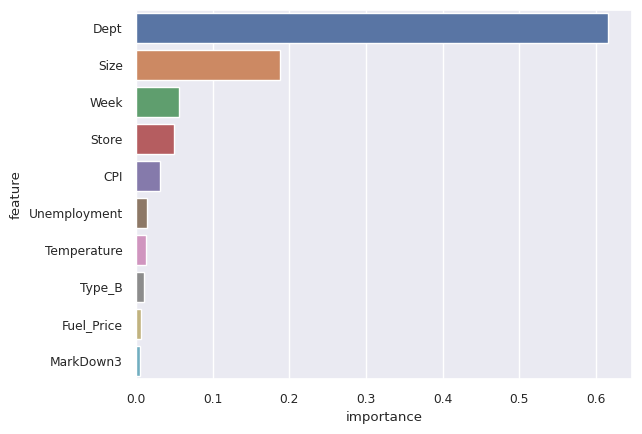

In [ ]:
sns.barplot(data=rf1_importance_df.head(10), x='importance', y='feature')

The variables Dept, Size, Week and Store are the most important for this model

### Gradient Boosting

We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

 1.   The average value of the target column and uses as an initial prediction every input.
 2.   The residuals (difference) of the predictions with the targets are computed.
 3.   A decision tree of limited depth is trained to predict just the residuals for each input.
 4.   Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
 5.   Scaled predictions fro the tree are added to the previous predictions to obtain the new and improved predictions.
 6.   Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model.

To train a GBM, we can use the XGBRegressor class from the XGBoost library.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
gb1 = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

Let's train the model using gb1.fit.

In [ ]:
%%time
gb1.fit(train_inputs, train_targets)

CPU times: user 9.4 s, sys: 67 ms, total: 9.47 s
Wall time: 6.13 s


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=20, n_jobs=-1, num_parallel_tree=None, predictor=None,
             random_state=42, ...)

We can now make predictions and evaluate the model using `gb1.predict`

Let's evaluate the predictions using RMSE error and WMAE error.

In [ ]:
gb1_train_preds = gb1.predict(train_inputs)

In [ ]:
gb1_train_rmse = mean_squared_error(train_targets, gb1_train_preds, squared=False)

In [ ]:
gb1_val_preds = gb1.predict(val_inputs)

In [ ]:
gb1_val_rmse = mean_squared_error(val_targets, gb1_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(gb1_train_rmse, gb1_val_rmse))

Train RMSE: 11501.05695496358, Validation RMSE: 10116.476514642958


Here, we can see that the RMSE loss for our train data is 11501.05695496358 and the RMSE loss for our validation data is 10116.476514642958

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - gb1.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - gb1.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(7028.68408879325, 6497.7824140467055)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 7028.68408879325, Validation WMAE: 6497.7824140467055


Here, we can see that the WMAE loss for our train data is 7028.68408879325 and the WMAE loss for our validation data is 6497.7824140467055

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gb1.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
importance_df.head(10)

,feature,importance
1,Dept,0.267882
12,Size,0.244064
8,MarkDown3,0.142380
15,Type_B,0.116146
0,Store,0.066598
5,CPI,0.046335
13,Week,0.044728
2,IsHoliday,0.043539
11,Unemployment,0.017044
3,Temperature,0.009175


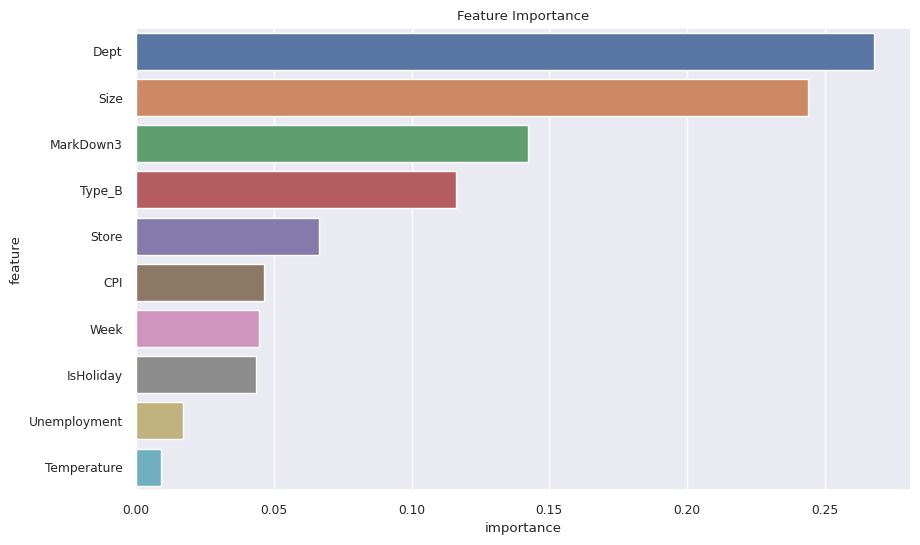

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

The variables Dept, Size, MarkDown3 and Type_B are the most important for this model.

## 6. Hyperparameter Tuning

### Decision Tree

The DecisionTreeClassifier accepts several arguments, some of which can be modified to reduce overfitting.
These arguments are called hyperparameters because they must be configured manually (as opposed to the parameters within the model which are learned from the data. We'll explore a couple of hyperparameters:

  -  max_depth
  -  max_leaf_nodes


#### max_depth

By reducing the maximum depth of the decision tree, we can prevent the tree from memorizing all training examples, which may lead to better generalization.


In [ ]:
tree2 = DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
%%time
tree2.fit(train_inputs, train_targets)

CPU times: user 451 ms, sys: 789 µs, total: 451 ms
Wall time: 453 ms


DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
tree_train_preds = tree2.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [ ]:
tree_val_preds = tree2.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 18380.044742738297, Validation RMSE: 17026.52552685074


In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - tree2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - tree2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(11754.896589953392, 11411.270375903501)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 11754.896589953392, Validation WMAE: 11411.270375903501


#### max_leaf_nodes

Another way to control the size of complexity of a decision tree is to limit the number of leaf nodes which allows branches of the tree to have varying depths.

In [ ]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=30, random_state=42)

In [ ]:
tree2.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_leaf_nodes=30, random_state=42)

In [ ]:
tree_train_preds = tree2.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [ ]:
tree_val_preds = tree2.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 13059.697189294453, Validation RMSE: 12092.210790199691


In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - tree2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - tree2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(8421.532607124094, 8072.312600116777)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 8421.532607124094, Validation WMAE: 8072.312600116777


#### Decision Tree after hyperparameter tuning

In [ ]:
tree2 = DecisionTreeRegressor(max_depth=80, max_leaf_nodes=640, random_state=42)

In [ ]:
tree2.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=80, max_leaf_nodes=640, random_state=42)

In [ ]:
tree_train_preds = tree2.predict(train_inputs)

In [ ]:
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)

In [ ]:
tree_val_preds = tree2.predict(val_inputs)

In [ ]:
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 5638.484555487519, Validation RMSE: 6762.0107079235395


In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - tree2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - tree2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(3552.6709934424694, 3822.344098923549)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 3552.6709934424694, Validation WMAE: 3822.344098923549


In [ ]:
def test_param(**params):
    model = DecisionTreeRegressor(random_state=42, **params).fit(train_inputs, train_targets)
    weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot1(param_name, param_values):
    train_errors, val_errors = [], []
    
    # Computing and appending the errors
    for value in param_values:
        param = {param_name: value}
        train_wmae, val_wmae = test_param(**param)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
        
    # Printing the errors for each parameter value
    print("Param_values:", param_values)
    print("Training_errors:", train_errors)
    print('Validation_errors:', val_errors)
    
    # Plotting the overfitting curve for the parameter
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Weighted Mean Absolute Error (WMAE)')
    plt.legend(['Training', 'Validation'])

Param_values: [10, 40, 80, 120]
Training_errors: [4653.860591399431, 0.027088616747160676, 3.8306759469305903e-19, 3.8306759469305903e-19]
Validation_errors: [4650.922197715639, 3002.2162254856607, 3007.502554822677, 3007.502554822677]


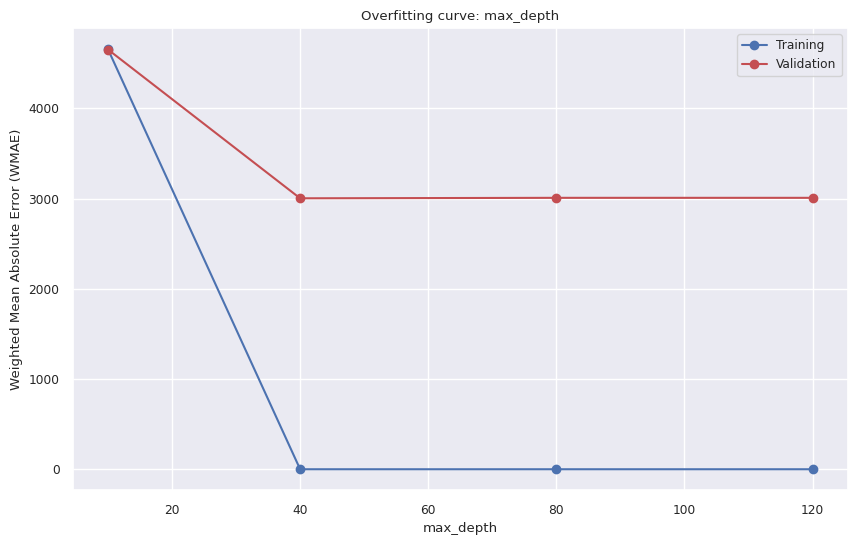

In [ ]:
test_param_and_plot1('max_depth', [10, 40, 80, 120])

Param_values: [600, 700, 800, 900, 1000]
Training_errors: [3632.5570241328896, 3430.6722715075007, 3259.2740259836182, 3150.8635397172534, 3041.788969650672]
Validation_errors: [3887.3281995962234, 3738.1808889512604, 3603.702196273619, 3541.9840528563204, 3476.4386876783087]


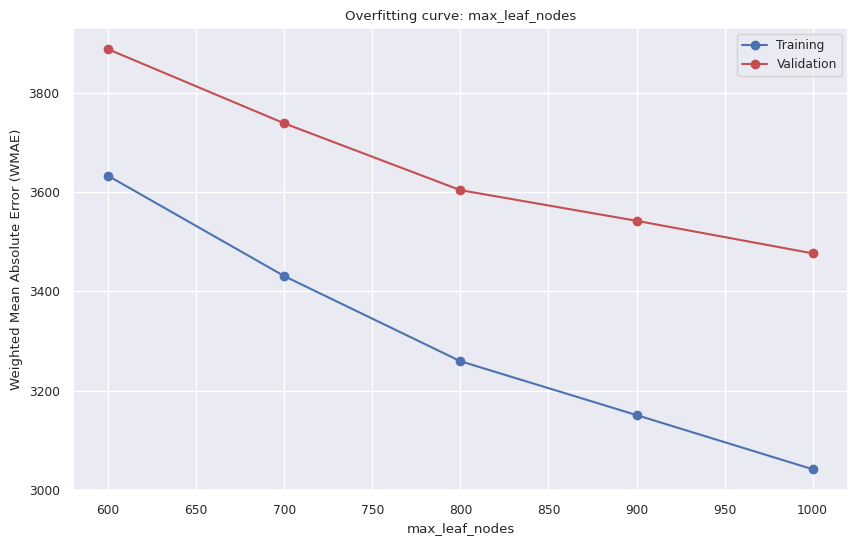

In [ ]:
test_param_and_plot1('max_leaf_nodes', [600,700,800,900,1000])

#### Training the Best Model

We create a Decision Tree model with custom hyperparameters.

In [ ]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=1000, max_depth=25, random_state = 42)

Now we train the model.

In [ ]:
tree2.fit(train_inputs, train_targets)

DecisionTreeRegressor(max_depth=25, max_leaf_nodes=1000, random_state=42)

Now we generate predictions for the final model.

In [ ]:
tree2_train_preds = tree2.predict(train_inputs)

In [ ]:
tree2_train_rmse = mean_squared_error(train_targets, tree2_train_preds, squared=False)

In [ ]:
tree2_val_preds = tree2.predict(val_inputs)

In [ ]:
tree2_val_rmse = mean_squared_error(val_targets, tree2_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree2_train_rmse, tree2_val_rmse))

Train RMSE: 4832.056928639684, Validation RMSE: 6534.547554722029


Here, we can see a decrease for the RMSE loss.

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - tree2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - tree2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(3041.788969650672, 3476.4386876783087)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 3041.788969650672, Validation WMAE: 3476.4386876783087


Here, we can see that the RMSE loss for our train data is 4832.056928639684, the RMSE loss for our validation data is 6534.547554722029, the WMAE loss for our train data is 3041.788969650672 and the WMAE loss for our validation data is 3476.4386876783087

#### Decision Tree Feature Importance

In [ ]:
tree2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
tree2_importance_df

,feature,importance
1,Dept,0.646350
12,Size,0.190771
13,Week,0.052478
0,Store,0.045787
5,CPI,0.026710
15,Type_B,0.011222
11,Unemployment,0.010629
3,Temperature,0.005023
14,Type_A,0.004689
4,Fuel_Price,0.002199


<Axes: xlabel='importance', ylabel='feature'>

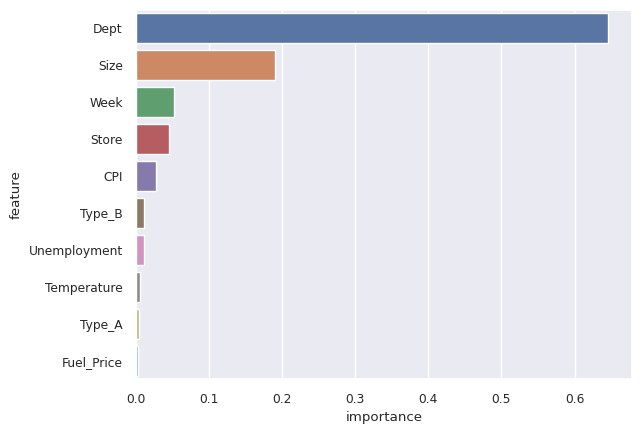

In [ ]:
sns.barplot(data=tree2_importance_df.head(10), x='importance', y='feature')

The variables Dept, Size, Week and Store are the most important for this model.

We can now make predictions using our final model.

In [ ]:
test_prediction1 = tree2.predict(test_inputs)

Let's replace the values of the Weekly_Sales column with our predictions.

In [ ]:
submission_df['Weekly_Sales'] = test_prediction1

Let's save it as a CSV file and download it.

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,18791.942726
1,1_1_2012-11-09,35937.904065
2,1_1_2012-11-16,11796.264489
3,1_1_2012-11-23,18955.260057
4,1_1_2012-11-30,18955.260057
...,...,...
115059,45_98_2013-06-28,1256.323003
115060,45_98_2013-07-05,1256.323003
115061,45_98_2013-07-12,61104.049444
115062,45_98_2013-07-19,3555.954025


### Random Forest Regressor model

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees.

Let's study some the hyperparameters for random forests. You can learn more about them here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
def test_param(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot2(param_name, param_values):
    train_errors, val_errors = [], []
    
    # Computing and appending the errors
    for value in param_values:
        param = {param_name: value}
        train_wmae, val_wmae = test_param(**param)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
        
    # Printing the errors for each parameter value
    print("Param_values:", param_values)
    print("Training_errors:", train_errors)
    print('Validation_errors:', val_errors)
    
    # Plotting the overfitting curve for the parameter
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Weighted Mean Absolute Error (WMAE)')
    plt.legend(['Training', 'Validation'])

Param_values: [1, 2, 3, 4, 5]
Training_errors: [628.7274369313566, 841.5535664034288, 1044.8981862779283, 1195.2982911572672, 1309.2735975482572]
Validation_errors: [2287.50932321124, 2274.115621629989, 2274.806946111672, 2282.6724108910894, 2291.7304279221757]


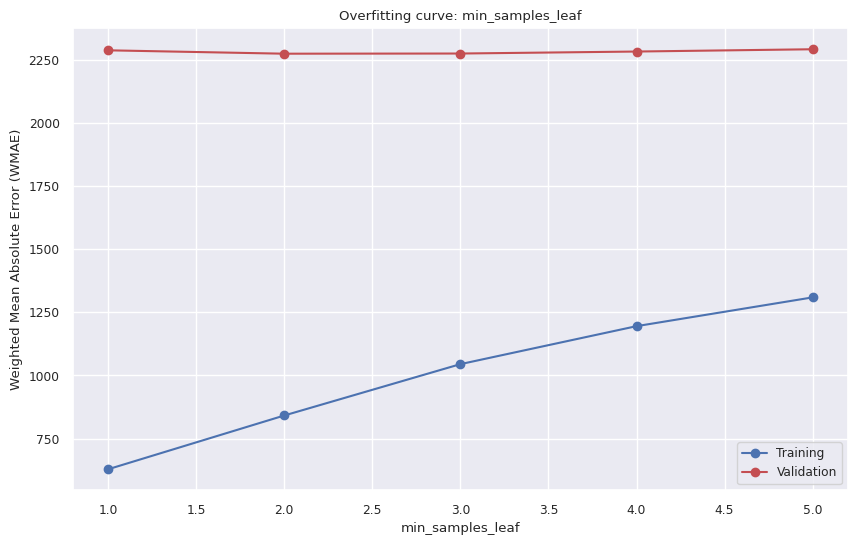

In [ ]:
test_param_and_plot2('min_samples_leaf', [1, 2, 3, 4, 5])

Param_values: [30, 60, 90, 120]
Training_errors: [8219.766275680013, 7105.170552390798, 6401.2909254753085, 5843.940568663366]
Validation_errors: [7880.952242668472, 6805.294686648243, 6175.259798460131, 5647.492174252013]


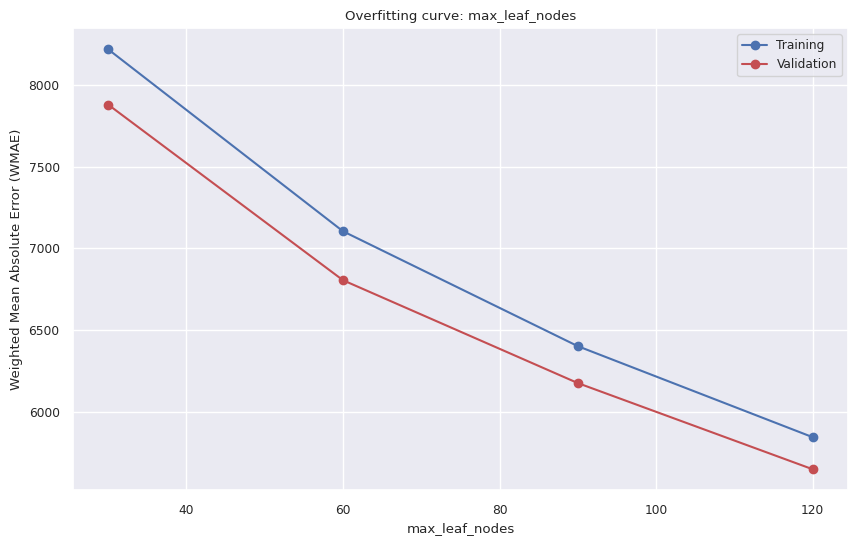

In [ ]:
test_param_and_plot2('max_leaf_nodes', [30, 60, 90, 120])

Param_values: [5, 10, 15, 20, 25]
Training_errors: [9385.413568156348, 4348.191949821665, 1812.9602769109658, 893.3196045647551, 665.413568150917]
Validation_errors: [8964.530392283506, 4318.251617327096, 2614.7872034862817, 2301.5551856334905, 2283.214020643234]


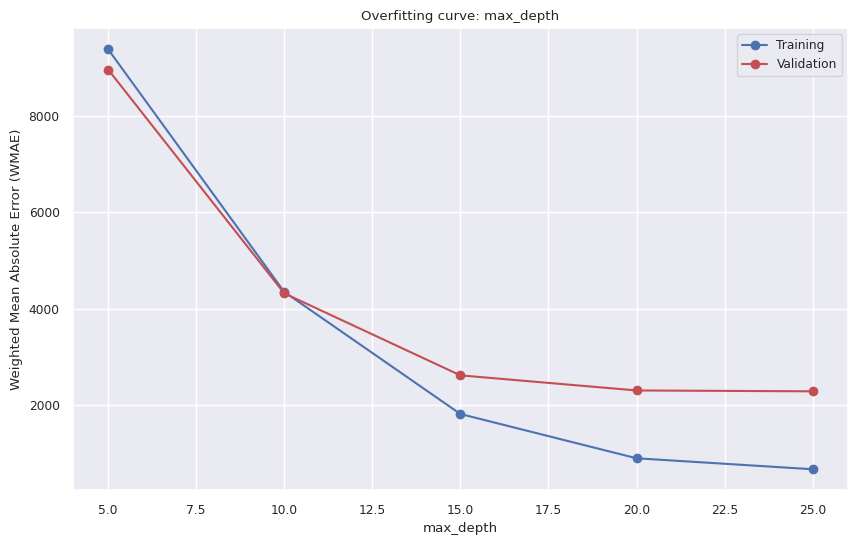

In [ ]:
test_param_and_plot2('max_depth', [5, 10, 15, 20, 25])

#### Training the Best Model

We create a new Random Forest model with custom hyperparameters.

In [ ]:
rf2 = RandomForestRegressor(n_estimators=17, min_samples_leaf = 3, max_depth = 20, random_state = 42)

Now we train the model.

In [ ]:
rf2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=20, min_samples_leaf=3, n_estimators=17,
                      random_state=42)

Now we generate predictions for the final model.

In [ ]:
rf2_train_preds = rf2.predict(train_inputs)

In [ ]:
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds, squared=False)

In [ ]:
rf2_val_preds = rf2.predict(val_inputs)

In [ ]:
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 2645.2635521161137, Validation RMSE: 5169.943105760316


Here, we can see a decrease for the RMSE loss.

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - rf2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - rf2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(1207.4523684086153, 2348.00578491392)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 1207.4523684086153, Validation WMAE: 2348.00578491392


Here, we can see that the RMSE loss for our train data is 2645.2635521161137, the RMSE loss for our validation data is 5169.943105760316, the WMAE loss for our train data is 1207.4523684086153 and the WMAE loss for our validation data is 2348.00578491392

### Random Forest Feature Importance

Let's look at the weights assigned to different columns, to figure out which columns in the dataset are the most important for this model.

In [ ]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
rf2_importance_df

,feature,importance
1,Dept,0.623776
12,Size,0.188482
13,Week,0.052617
0,Store,0.050027
5,CPI,0.030343
11,Unemployment,0.013977
15,Type_B,0.010480
3,Temperature,0.010192
8,MarkDown3,0.008108
4,Fuel_Price,0.004118


<Axes: xlabel='importance', ylabel='feature'>

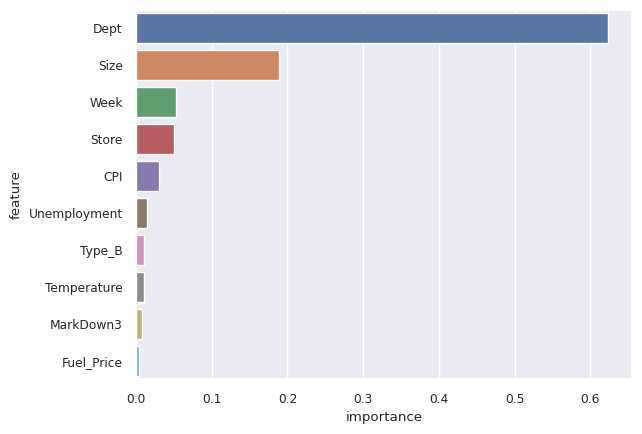

In [ ]:
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature')

The variables Dept, Size, Week and Store are the most important for this model.

We can now make predictions using our final model.

In [ ]:
test_prediction2 = rf2.predict(test_inputs)

Let's replace the values of the Weekly_Sales column with our predictions.

In [ ]:
submission_df['Weekly_Sales'] = test_prediction2

Let's save it as a CSV file and download it.

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,31109.820020
1,1_1_2012-11-09,35020.811025
2,1_1_2012-11-16,7799.378522
3,1_1_2012-11-23,36715.638909
4,1_1_2012-11-30,28769.578226
...,...,...
115059,45_98_2013-06-28,3156.198980
115060,45_98_2013-07-05,2443.203595
115061,45_98_2013-07-12,61471.529676
115062,45_98_2013-07-19,6429.062781


### Gradient Boosting Regressor model

In [ ]:
def test_param(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
    train_wmae = np.sum(np.multiply(abs(train_targets - model.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
    val_wmae = np.sum(np.multiply(abs(val_targets - model.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
    return train_wmae, val_wmae

In [ ]:
def test_param_and_plot3(param_name, param_values):
    train_errors, val_errors = [], []
    
    # Computing and appending the errors
    for value in param_values:
        param = {param_name: value}
        train_wmae, val_wmae = test_param(**param)
        train_errors.append(train_wmae)
        val_errors.append(val_wmae)
        
    # Printing the errors for each parameter value
    print("Param_values:", param_values)
    print("Training_errors:", train_errors)
    print('Validation_errors:', val_errors)
    
    # Plotting the overfitting curve for the parameter
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('Weighted Mean Absolute Error (WMAE)')
    plt.legend(['Training', 'Validation'])

Param_values: [30, 60, 90, 120, 150]
Training_errors: [4268.628485254655, 3520.885771055772, 3216.7294167375117, 3043.3995306227825, 2864.9083042321026]
Validation_errors: [4201.10216091189, 3684.413549612535, 3525.987871331715, 3467.7627299915066, 3380.09997774304]


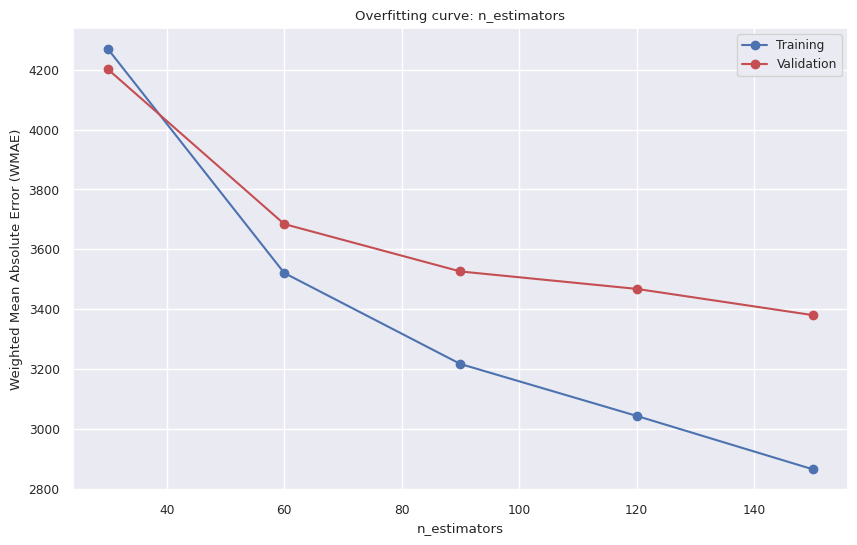

In [ ]:
test_param_and_plot3('n_estimators', [30, 60, 90, 120, 150])

Param_values: [10, 11, 12, 13, 14]
Training_errors: [1313.8926488097115, 1007.5670759412454, 800.305620733909, 593.7272983205636, 446.82849688775286]
Validation_errors: [2634.1861709624714, 2561.800924437504, 2474.080152203208, 2442.0630877820204, 2411.465534222052]


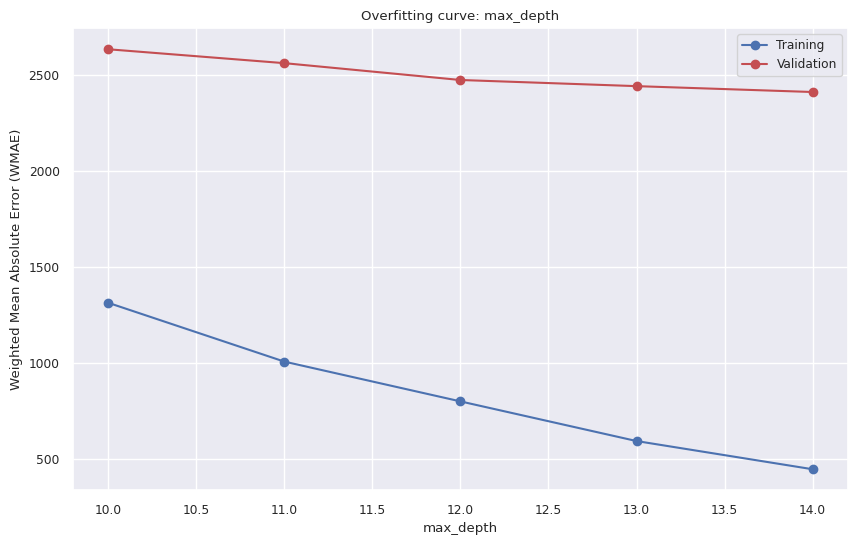

In [ ]:
test_param_and_plot3('max_depth', [10, 11, 12, 13, 14])

Param_values: [0.1, 0.2, 0.3, 0.4, 0.5]
Training_errors: [4089.9092069716125, 3382.8622303449783, 3154.9211061488422, 2974.397693343007, 2879.951201077925]
Validation_errors: [3994.5183808926963, 3540.556841786355, 3511.819714475407, 3636.650215226981, 3431.5455563071396]


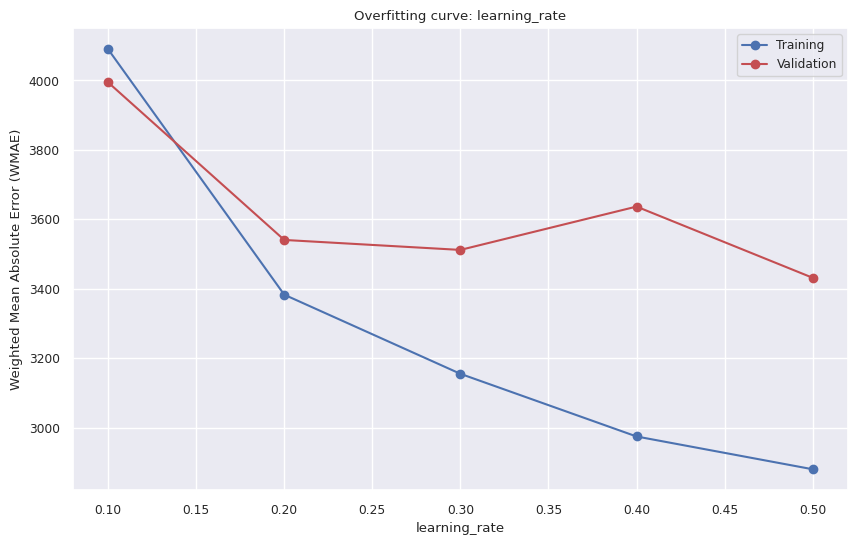

In [ ]:
test_param_and_plot3('learning_rate', [0.1, 0.2, 0.3, 0.4, 0.5])

#### Training the Best Model

We create a new Gradient Boosting model with custom hyperparameters.

In [ ]:
gb2 = XGBRegressor(n_estimators=300, max_depth=13, random_state = 42, n_jobs=-1)

Now we train the model.

In [ ]:
gb2.fit(train_inputs, train_targets)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=13, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=-1, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

Now we generate predictions for the final model.

In [ ]:
gb2_train_preds = gb2.predict(train_inputs)

In [ ]:
gb2_train_rmse = mean_squared_error(train_targets, gb2_train_preds, squared=False)

In [ ]:
gb2_val_preds = gb2.predict(val_inputs)

In [ ]:
gb2_val_rmse = mean_squared_error(val_targets, gb2_val_preds, squared=False)

In [ ]:
print('Train RMSE: {}, Validation RMSE: {}'.format(gb2_train_rmse, gb2_val_rmse))

Train RMSE: 409.8216356830849, Validation RMSE: 4944.543628284755


Here, we can see a decrease for the RMSE loss.

In [ ]:
weights_train = train_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
weights_val = val_inputs.IsHoliday.apply(lambda x: 5 if x else 1)
train_wmae = np.sum(np.multiply(abs(train_targets - gb2.predict(train_inputs)), weights_train)) / (np.sum(weights_train))
val_wmae = np.sum(np.multiply(abs(val_targets - gb2.predict(val_inputs)), weights_val)) / (np.sum(weights_val))
train_wmae, val_wmae

(254.29470316855276, 2464.3262836225936)

In [ ]:
print('Train WMAE: {}, Validation WMAE: {}'.format(train_wmae, val_wmae))

Train WMAE: 254.29470316855276, Validation WMAE: 2464.3262836225936


Here, we can see that the RMSE loss for our train data is 409.8216356830849, the RMSE loss for our validation data is 4944.543628284755, the WMAE loss for our train data is 254.29470316855276 and the WMAE loss for our validation data is 2464.3262836225936

#### Gradient Boosting Feature Importance

In [ ]:
gb2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': gb2.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
gb2_importance_df

,feature,importance
12,Size,0.302310
15,Type_B,0.283370
1,Dept,0.126498
13,Week,0.079376
14,Type_A,0.075907
0,Store,0.026778
5,CPI,0.023530
11,Unemployment,0.021232
9,MarkDown4,0.016103
2,IsHoliday,0.016016


<Axes: xlabel='importance', ylabel='feature'>

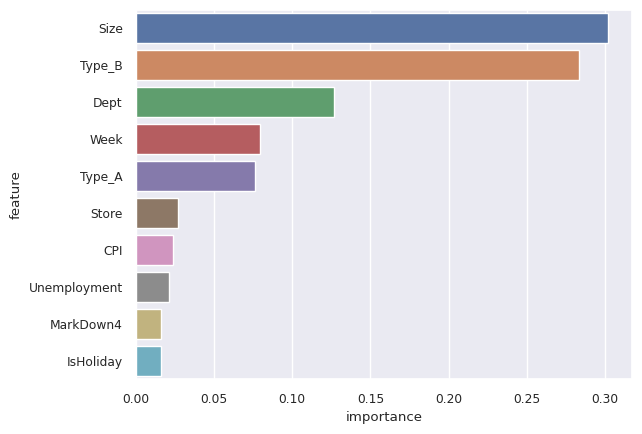

In [ ]:
sns.barplot(data=gb2_importance_df.head(10), x='importance', y='feature')

The variables Size, Type_B, Dept, Week and Type_A are the most important for this model.

We can now make predictions using our final model.

In [ ]:
test_prediction3 = gb2.predict(test_inputs)

Let's replace the values of the Weekly_Sales column with our predictions.

In [ ]:
submission_df['Weekly_Sales'] = test_prediction3

Let's save it as a CSV file and download it.

In [ ]:
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,Id,Weekly_Sales
0,1_1_2012-11-02,33446.515625
1,1_1_2012-11-09,35526.226562
2,1_1_2012-11-16,7009.915527
3,1_1_2012-11-23,34933.675781
4,1_1_2012-11-30,27624.544922
...,...,...
115059,45_98_2013-06-28,4375.292969
115060,45_98_2013-07-05,4832.861816
115061,45_98_2013-07-12,59204.765625
115062,45_98_2013-07-19,5218.538086


## 7. Reporting the performance of the best model and predicting sales of the test dataset

The best model we built in this project is the `Random Forest model` followed by `Gradient Boosting model` and finally the `Decision Tree model`.

To predict the sales on the test dataset, we will use the `Random Forest model` mentioned above, then we will add a column on the DataFrame with the `Predicted sales`and finally end the project.

In [ ]:
test_inputs['Predicted_sales'] = rf2.predict(test_inputs)

In [ ]:
test_inputs

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Unemployment,Size,Week,Type_A,Type_B,Type_C,Predicted_sales
0,0.0,0.000000,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0,31109.820020
1,0.0,0.010204,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0,35020.811025
2,0.0,0.020408,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0,7799.378522
3,0.0,0.030612,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0,36715.638909
4,0.0,0.040816,0.0,0.573142,0.457916,0.946424,0.090103,0.051662,0.001537,0.053945,0.003788,0.271804,0.630267,0.843137,1.0,0.0,0.0,28769.578226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1.0,0.938776,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0,3156.198980
115060,1.0,0.948980,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0,2443.203595
115061,1.0,0.959184,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0,61471.529676
115062,1.0,0.979592,0.0,0.762999,0.667335,0.494569,0.028249,0.010665,0.001212,0.000161,0.002656,0.299627,0.451136,0.568627,0.0,1.0,0.0,6429.062781


## Summary


Our goal in this project was to create a machine learning model that could predict Walmart's weekly sales. We began by downloading the data, installing the required modules, and importing the modules (Section 1), after which we took some time to comprehend the dataset and the problem description (Section 2). Then, we completed the data preparation and exploratory data analysis (Section 3), which are required to fully comprehend the trends in sales over time in connection to the type of store, the size of the store, and other variables. We trained a hardcoded and baseline model in (Section 4) using our stupid value as a base value. We were able to eventually train, analyse, and refine four distinct machine learning models (Section 5), hypertuned at (Section 6), and select a random forest regressor model for these data after having a better grasp of the patterns in the data. We utilised the random forest regressor model, which was deemed to be the best model by the validation error/score, to predict the weekly sales for the test dataset (Section 7).

## Future Works



 1.   Tune other hyperparameters which we haven't tuned on our machine learning models, optimal hyperparameter tuning for example with RandomSearchCV.
 2.   Tune Lasso, SGD, LightGBM models.
 3.   Test how other machine learning models perform with this dataset.
 4.   Remove outliers and perform prediction.
 5.   Strive to improve kaggle score.



## References

 1.   https://jovian.ai/
 2.   https://jovian.ai/aakashns/sklearn-decision-trees-random-forests
 3.   https://jovian.ai/aakashns/python-gradient-boosting-machines
 4.   https://jovian.com/wagb2b2/course-project-forecasting-walmart-sales
 5.   https://jovian.com/sergioalves94/walmart-store-sales-forecasting
 6.   https://scikit-learn.org/stable/
 7.   https://scikit-learn.org/stable/modules/preprocessing.html
 8.   https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
 9.   https://xgboost.readthedocs.io/en/latest/
 10.  https://www.investopedia.com/terms/c/consumerpriceindex.asp 
